In [63]:
import pandas as pd
data=pd.read_excel('D:\BaiduNetdiskDownload\data.xlsx')
data["shop_name"].value_counts()

阿里健康大药房                  16958
天猫国际进口超市                  7760
康爱多大药房旗舰店                 4051
天猫超市                      3764
ChemistWarehouse海外旗舰店     3205
焦作国控大药房旗舰店                3027
阿里健康大药房海外店                2938
nyc美林健康海外专营店              2823
thejamy保健海外专营店            2345
百康保健品专营店                  2224
康恩贝官方旗舰店                  2196
hihealth海外专营店             2196
宜度海外专营店                   2165
天猫国际妙颜社                   1755
NRC营养优选海外专营店              1742
苏宁易购官方旗舰店                 1681
nrfs湖畔海外专营店               1559
进口/国产保健品精品店               1525
康寿营养品店                    1516
百秀大药房旗舰店                  1505
LuckyVitamin海外旗舰店         1497
skyshop海外专营店              1435
搬运健康馆                     1423
美加精品                      1373
SASA美国直邮                  1228
同堂保健品专营店                  1219
Name: shop_name, dtype: int64

In [64]:
data["discount"].value_counts()

9.5折    32338
9折      29929
8.5折     9959
10折      2884
Name: discount, dtype: int64

这段代码的核心功能是：
从一个包含商店信息的 DataFrame 中提取折扣信息，并将其转换为数值格式。
计算基于价格、销售量和折扣的总销售额。
将折扣信息和总销售额分别导出到 Excel 文件，方便后续的数据分析和可视化。

In [65]:
import pandas as pd

# 假设 data 是一个已经定义好的 DataFrame，其中包含 shop_name, discount, price, 和 sold 列

discount_num = []
for i in range(len(data["shop_name"])):
    discount_num.append(0)

for i in range(len(data["shop_name"])):
    if data.loc[i, "discount"] == "10折":
        discount_num[i] = 1.0 
    elif data.loc[i, "discount"] == "9.5折":
        discount_num[i] = 0.95
    elif data.loc[i, "discount"] == "9折":
        discount_num[i] = 0.90
    elif data.loc[i, "discount"] == "8.5折":
        discount_num[i] = 0.85 

# 创建包含折扣的 DataFrame
df_1 = pd.DataFrame({'shop_name': data['shop_name'], 'discount_num': discount_num})
df_1.to_excel('D:\\BaiduNetdiskDownload\\data_1.xlsx', sheet_name='sheet1', index=None)

total_price = []
for i in range(len(data["shop_name"])):
    total_price.append(0)

for i in range(len(data["shop_name"])):
    price = data.loc[i, "price"]
    sold = float(data.loc[i, "sold"])
    discount = discount_num[i]
    total_price[i] = float(price) * float(sold) * float(discount)

# 创建包含总价和商店名称的 DataFrame
df_2 = pd.DataFrame({
    'shop_name': data['shop_name'],
    'total_price': total_price
})

df_2.to_excel('D:\\BaiduNetdiskDownload\\data_2.xlsx', sheet_name='sheet1', index=None)

# 读取结果
data1 = pd.read_excel('D:\\BaiduNetdiskDownload\\data_2.xlsx')
data1


,shop_name,total_price
0,宜度海外专营店,1041.390
1,天猫国际进口超市,31950.000
2,阿里健康大药房,7794.275
3,天猫国际进口超市,12029.850
4,阿里健康大药房,10704.000
...,...,...
75105,阿里健康大药房,182044.800
75106,阿里健康大药房海外店,34938.000
75107,hihealth海外专营店,7416.900
75108,阿里健康大药房,7871.850


这段代码的主要功能是对一个名为 data1 的数据集进行分组和汇总，计算每个商店的总价格，并按总价格升序排列。

In [66]:
total_shop = data1.groupby("shop_name")["total_price"].sum().reset_index()
total_shop=total_shop.sort_values("total_price",ascending=True)
total_shop

,shop_name,total_price
9,同堂保健品专营店,6.539738e+04
3,SASA美国直邮,3.258235e+05
1,LuckyVitamin海外旗舰店,3.697916e+05
14,康寿营养品店,6.198878e+05
21,美加精品,6.466264e+05
23,进口/国产保健品精品店,7.276764e+05
17,搬运健康馆,7.948006e+05
5,nrfs湖畔海外专营店,8.727912e+05
2,NRC营养优选海外专营店,1.408813e+06
18,焦作国控大药房旗舰店,1.546531e+06


这段代码的主要功能是通过对数据框中的“shop_name”列进行分组，计算每个商店的“total_price”总和，并将结果返回为一个新的数据框。

In [67]:
total_shop = data1.groupby("shop_name")["total_price"].sum().reset_index()
total_shop

,shop_name,total_price
0,ChemistWarehouse海外旗舰店,5.539680e+07
1,LuckyVitamin海外旗舰店,3.697916e+05
2,NRC营养优选海外专营店,1.408813e+06
3,SASA美国直邮,3.258235e+05
4,hihealth海外专营店,3.382795e+06
5,nrfs湖畔海外专营店,8.727912e+05
6,nyc美林健康海外专营店,4.343254e+06
7,skyshop海外专营店,6.506159e+06
8,thejamy保健海外专营店,9.798825e+06
9,同堂保健品专营店,6.539738e+04


这段代码的主要功能是在给定商店的总价数据中计算并返回每个商店总价在总体总价中的占比，从而实现对商店数据的归一化处理。

In [68]:
total=sum(total_shop["total_price"])
total_shop_new = total_shop
for i in range(len(total_shop["total_price"])):
    total_shop_new["total_price"][i]=(total_shop_new["total_price"][i])/total
total_shop_new

C:\Users\LENOVO\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,shop_name,total_price
0,ChemistWarehouse海外旗舰店,0.036921
1,LuckyVitamin海外旗舰店,0.000246
2,NRC营养优选海外专营店,0.000939
3,SASA美国直邮,0.000217
4,hihealth海外专营店,0.002255
5,nrfs湖畔海外专营店,0.000582
6,nyc美林健康海外专营店,0.002895
7,skyshop海外专营店,0.004336
8,thejamy保健海外专营店,0.006531
9,同堂保健品专营店,0.000044


这段代码的主要功能是对 total_shop 数据集按照 total_price 列进行升序排序，并更新原数据集。

In [69]:
total_shop=total_shop.sort_values("total_price",ascending=True)
total_shop

,shop_name,total_price
9,同堂保健品专营店,0.000044
3,SASA美国直邮,0.000217
1,LuckyVitamin海外旗舰店,0.000246
14,康寿营养品店,0.000413
21,美加精品,0.000431
23,进口/国产保健品精品店,0.000485
17,搬运健康馆,0.000530
5,nrfs湖畔海外专营店,0.000582
2,NRC营养优选海外专营店,0.000939
18,焦作国控大药房旗舰店,0.001031


In [70]:
total_shop=total_shop.sort_values("total_price",ascending=True)
total_shop

,shop_name,total_price
9,同堂保健品专营店,0.000044
3,SASA美国直邮,0.000217
1,LuckyVitamin海外旗舰店,0.000246
14,康寿营养品店,0.000413
21,美加精品,0.000431
23,进口/国产保健品精品店,0.000485
17,搬运健康馆,0.000530
5,nrfs湖畔海外专营店,0.000582
2,NRC营养优选海外专营店,0.000939
18,焦作国控大药房旗舰店,0.001031


这段代码的主要功能是使用matplotlib库绘制并展示一个中文饼状图，清晰地显示不同品牌在市场中的占比。

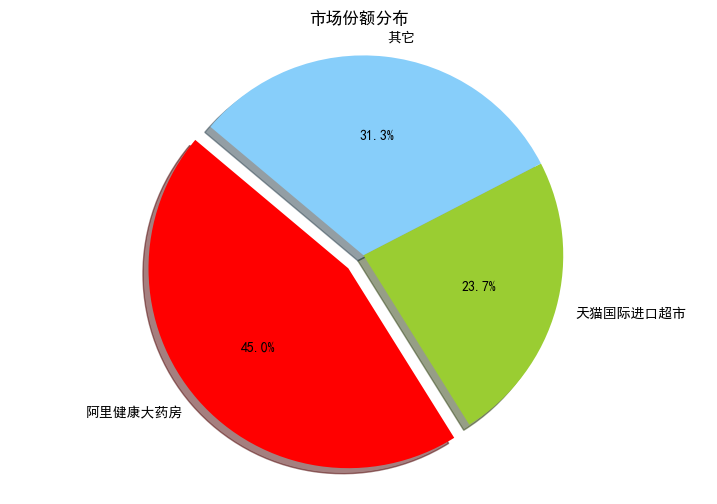

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体参数，以便显示中文
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

# 调节图形大小，宽，高
plt.figure(figsize=(9, 6))

# 定义饼状图的标签
labels = [u"阿里健康大药房", u"天猫国际进口超市", u"其它"]
# 每个标签占多大，会自动去算百分比
sizes = [0.450, 0.237, 0.313]
# 颜色设置
colors = ['red', 'yellowgreen', 'lightskyblue']
# 将某部分爆炸出来
explode = (0.1, 0, 0)  # 仅仅“爆炸”第一块

# 绘制饼状图
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# 确保饼图为圆形
plt.axis('equal')

# 显示图形
plt.title(u"市场份额分布")
plt.show()


这段代码的主要功能是创建一个清晰的条形图，展示各个药店的销售额占比。

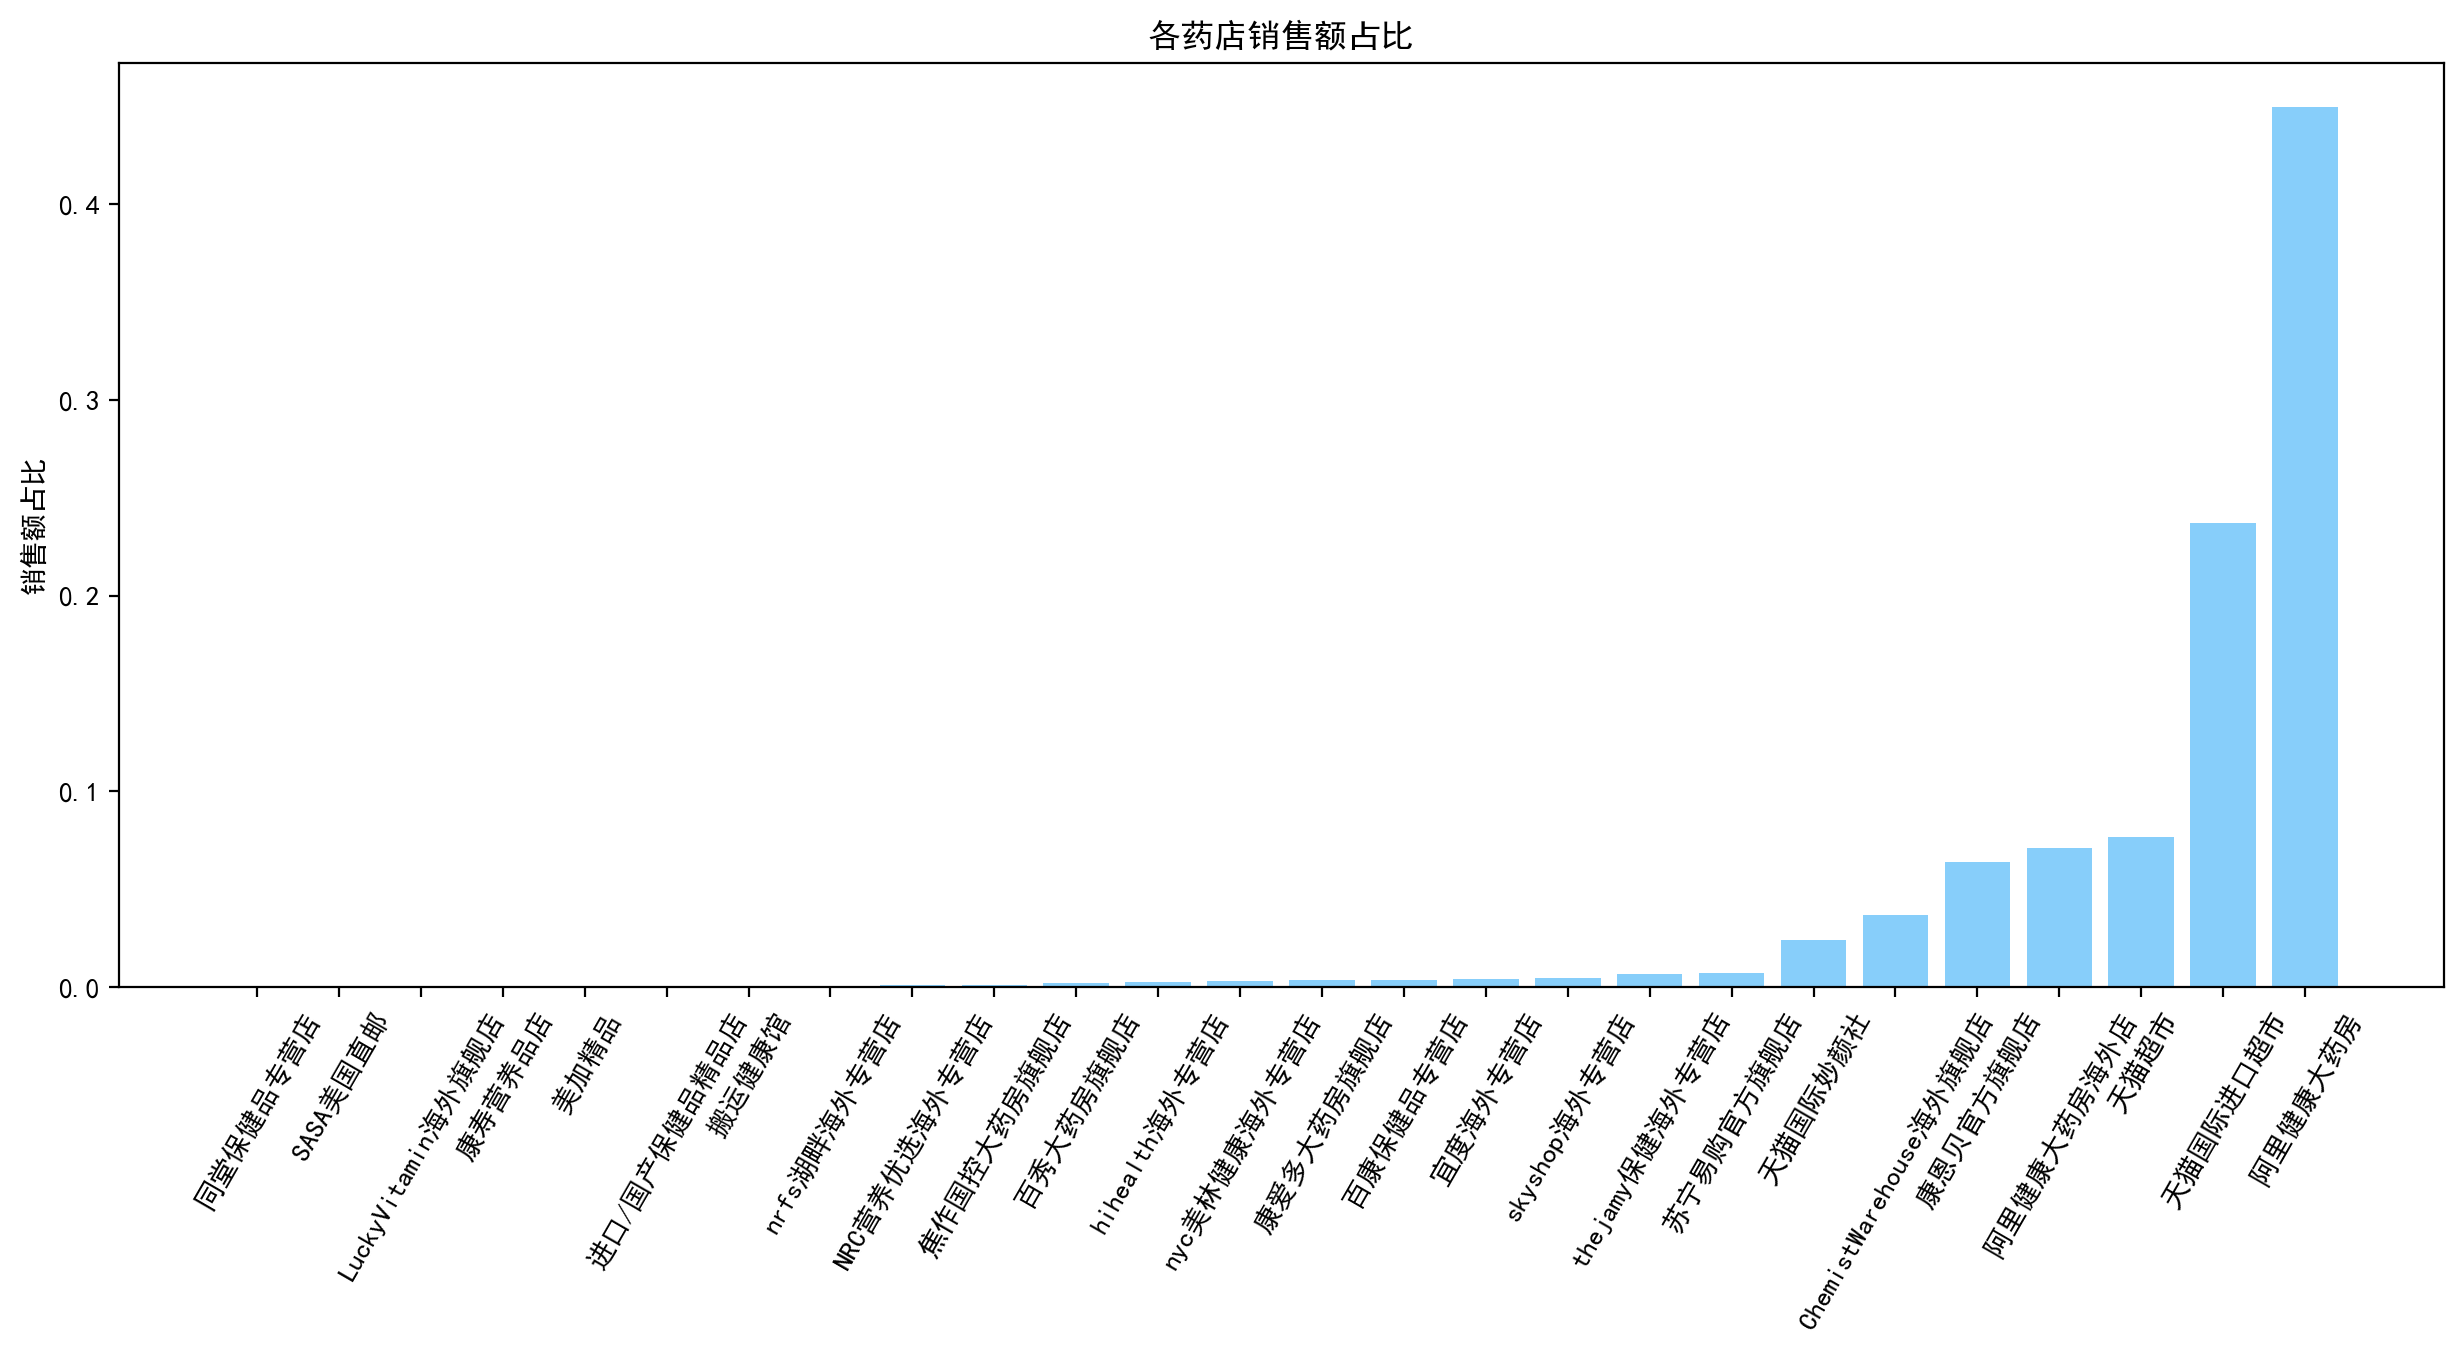

In [72]:
plt.figure(figsize=(15,6),dpi=200)
x=total_shop["shop_name"]
plt.bar(x, total_shop["total_price"], color='#87CEFA')
# plt.xlabel('时间')
plt.xticks(total_shop["shop_name"],rotation=60)
plt.ylabel('销售额占比')
plt.title('各药店销售额占比')
plt.show()

从包含多家商店订单信息的数据框中筛选出特定商店“阿里健康大药房”的所有记录。
然后，统计并显示该商店不同折扣值的频率分布情况。

In [73]:
data2=data[data["shop_name"]=="阿里健康大药房"]
data2["discount"].value_counts()

9.5折    10768
9折       4953
10折       663
8.5折      574
Name: discount, dtype: int64

绘制一个饼图清晰地展示阿里健康大药房的折扣情况。

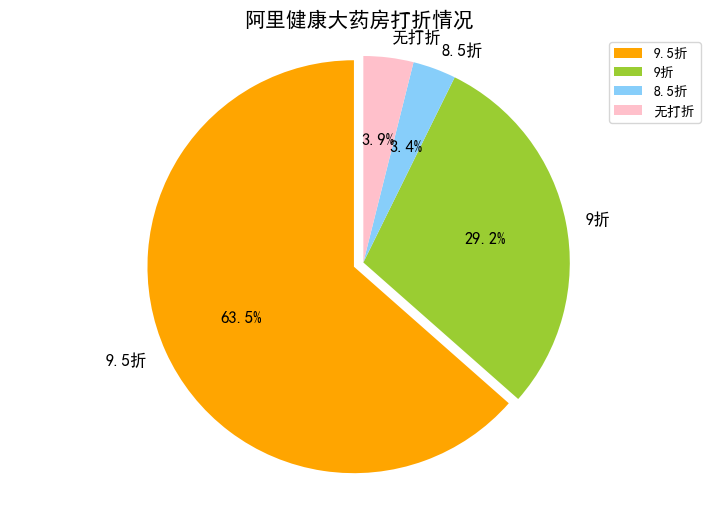

In [74]:
plt.figure(figsize=(9,6))
labels = [u"9.5折",u"9折",u"8.5折",u"无打折"]
sizes = [10768,4953,574,663]
colors = ['orange','yellowgreen','lightskyblue','pink']
explode = (0.05,0,0,0)
patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6) 
for t in l_text:
    t.set_size(12)
for t in p_text:
    t.set_size(12)
plt.axis('equal')
plt.title('阿里健康大药房打折情况', size=15)
plt.legend()
plt.show()


对数据框data2根据sold这一列的数值进行降序排序，并将结果存储在变量df3中。

In [75]:
df3=data2.sort_values(by="sold" , ascending=False)
df3

,date_time,id,shop_name,title,sku_name,price,sold,discount,brand,parameter
58239,2021-12-01,4418809521757,阿里健康大药房,3盒】星鲨维生素D滴剂(胶囊型)24粒补钙维生素D3佝偻病官方婴儿钙,3盒装 | 拍2优惠 | 维D促进钙吸收,106.666667,103940,9折,NaN,药品名称:维生素D滴剂（胶囊型）||生产企业:国药控股星鲨制药（厦门）有限公司||产品名称:...
26620,2021-06-01,4543217834215,阿里健康大药房,3盒】星鲨维生素D滴剂(胶囊型)24粒补钙维生素D佝偻病官方婴儿钙,3盒装 | 拍2优惠| 促进钙吸收,109.000000,73061,9.5折,NaN,药品名称:维生素D滴剂（胶囊型）||生产企业:国药控股星鲨制药（厦门）有限公司||产品名称:...
31883,2021-08-01,4418809521757,阿里健康大药房,3盒】星鲨维生素D滴剂(胶囊型)24粒补钙维生素D佝偻病官方婴儿钙,3盒装 | 拍2更优惠 | D促进钙吸收,109.000000,70625,9.5折,NaN,药品名称:维生素D滴剂（胶囊型）||生产企业:国药控股星鲨制药（厦门）有限公司||产品名称:...
74446,2021-02-01,3435079967513,阿里健康大药房,恒健维生素C片VC 维C100片补充维生素C妊娠呕吐发少发黄vc片药用,标准装1盒,3.400000,45895,9折,NaN,药品名称:维生素C片||生产企业:广东恒健制药有限公司||规格:100mg*100片/片||...
47489,2021-02-01,571172601110,阿里健康大药房,CONBA/康恩贝 维生素C咀嚼片（香橙味） 1.2g/片*100片补充维C VC,NaN,18.900000,44511,8.5折,NaN,厂名:华润圣海健康科技有限公司||产品名称:CONBA/康恩贝 维生素C咀嚼片（香橙味） 1...
...,...,...,...,...,...,...,...,...,...,...
70770,2021-09-01,559409418908,阿里健康大药房,礼盒装汤臣倍健维生素C片vc片维C咀嚼片E官网天然维生素e软胶囊ve,NaN,109.000000,0,9折,NaN,品牌:汤臣倍健||品牌:BY－HEALTH/汤臣倍健||系列:维生素C片（橘子味）+维生素E...
44963,2021-01-01,3621111355030,阿里健康大药房,恒健维生素C片VC 维C100mg*100片/瓶补充维生素C妊娠呕吐发少发黄,1盒本品+川奇3+1牌铁锌钙氨基酸口服液 10ml/支*10支/盒,13.000000,0,8.5折,恒健,药品名称:维生素C片||生产企业:广东恒健制药有限公司||规格:100mg*100片/片||...
11440,2021-05-01,4475310558004,阿里健康大药房,海迪威维生素C泡腾片15片过敏维生素缺乏坏血病vc片泡腾 维c泡腾,套餐二：5盒，家庭装,93.000000,0,9.5折,NaN,产品名称:海迪威 维生素C泡腾片 0.5g*15片/盒||品牌:海迪威||药品通用名:维生素...
14259,2021-03-01,4475654714725,阿里健康大药房,亚宝维和维生素C泡腾片15片增强免疫力 过敏 预防传染性疾病 流感,套餐一：3盒常备装,115.000000,0,9.5折,NaN,药品通用名:维生素C泡腾片||规格:1g*15片/盒||药品名称:维生素C泡腾片||生产企业...


从Excel文件中读取数据，筛选出特定商店（“阿里健康大药房”）的销售记录，并按日期计算每一天的销售总额。

In [76]:
data3=pd.read_excel('D:\BaiduNetdiskDownload\datanew.xlsx')
data4=data3[data3["shop_name"]=="阿里健康大药房"]
total_month= data4.groupby("date_time")["total_price"].sum().reset_index()
total_month

,date_time,total_price
0,2020-01-01,1.092576e+07
1,2020-02-01,9.885606e+06
2,2020-03-01,1.656051e+07
3,2020-04-01,1.579910e+07
4,2020-05-01,1.383416e+07
5,2020-06-01,2.813641e+07
6,2020-07-01,1.408467e+07
7,2020-08-01,1.767333e+07
8,2020-09-01,1.865158e+07
9,2020-10-01,1.443941e+07


可视化阿里健康大药房在2020年和2021年期间每个月的销售额变化。通过绘制折线图，用户可以直观地观察到销售额的趋势。

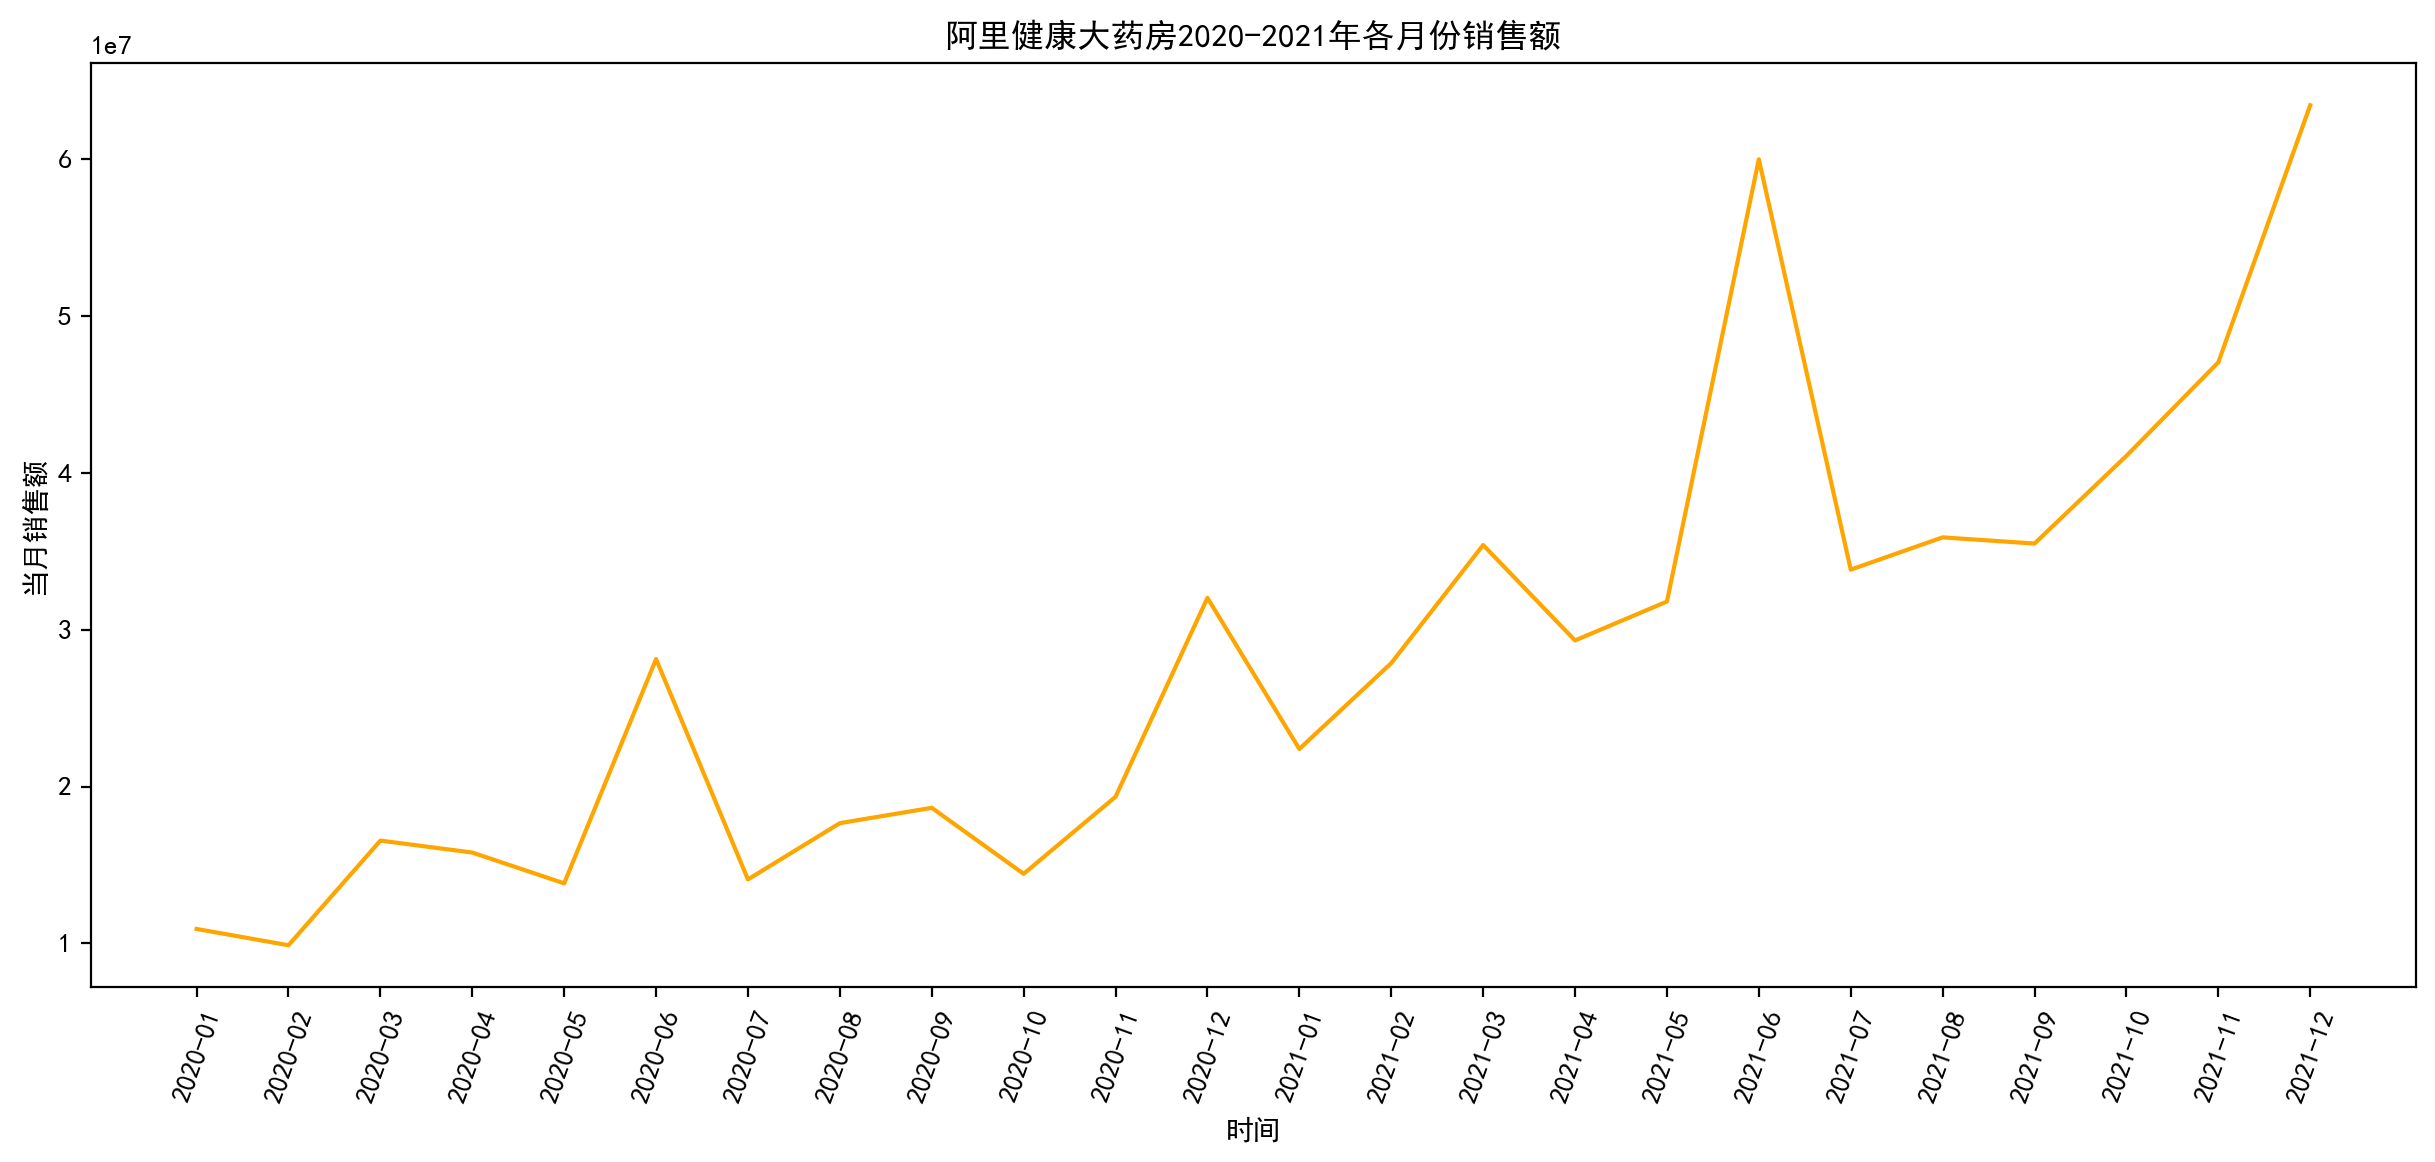

In [77]:
plt.figure(figsize=(15,6),dpi=200)
x=["2020-01","2020-02","2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12",
   "2021-01","2021-02","2021-03","2021-04","2021-05","2021-06","2021-07","2021-08","2021-09","2021-10","2021-11","2021-12"]
y=total_month["total_price"]
plt.plot(x, y, color='orange')
plt.xlabel('时间')
plt.xticks(x,rotation=70)
plt.ylabel('当月销售额')
plt.title('阿里健康大药房2020-2021年各月份销售额')
plt.show()

这段代码的主要功能是对销售数据进行聚合和排序。首先，它根据商品的标题汇总销售数量，并计算每种商品的总销量；随后，结果按销量降序排列，以便能直观查看哪些商品的销售量最高。

In [78]:
data5=data4.groupby("title")["sold"].sum().reset_index()
data5.sort_values(by="sold" , ascending=False)

,title,sold
363,丽点维A酸乳膏20g去闭口粉刺暗疮软膏维生素a维a乳酸膏乳软膏祛痘,404107
105,3盒】星鲨维生素D滴剂(胶囊型)24粒补钙维生素D佝偻病官方婴儿钙,267120
1190,浙江医药维生素E软胶囊30粒心脑血管疾病 习惯性流产不孕ve胶囊,252963
9,21金维他多维元素片100片复合维生素B b6 b1 b2维生素c钙铁锌21,232891
1026,星鲨维生素D滴剂(胶囊型)30粒儿童补钙补充维生素D发育迟缓佝偻病,227536
...,...,...
1614,限量买1送2 汤臣倍健R葡萄籽维生素C加E片 410mg/片*90片VCVE成人,0
1372,维生素B2片5mg*100片/瓶脂溢性皮炎口角炎唇干裂结膜炎阴囊炎,0
1108,汤臣倍健 维生素C片（橘子味）+维生素E60粒礼盒天然维生素e维C,0
1133,汤臣倍健R葡萄籽维生素C加E片 410mg/片*90片VCVE成人,0


这段代码的目的是从 data4 数据框中计算每个标题（title）的总销售价格（total price），并将结果按照总价格从高到低进行排序。

In [79]:
data5=data4.groupby("title")["total_price"].sum().reset_index()
data5.sort_values(by="total_price" , ascending=False)

,title,total_price
1637,领券减】爱乐维复合维生素100片孕妇叶酸补充备孕早期多维元素B,3.569218e+07
105,3盒】星鲨维生素D滴剂(胶囊型)24粒补钙维生素D佝偻病官方婴儿钙,2.836576e+07
116,3盒包邮】达因伊可新维生素AD滴剂30粒1岁以上AD预防佝偻病ad滴剂,1.622559e+07
104,3盒】星鲨维生素D滴剂(胶囊型)24粒补钙维生素D3佝偻病官方婴儿钙,1.612723e+07
9,21金维他多维元素片100片复合维生素B b6 b1 b2维生素c钙铁锌21,1.508954e+07
...,...,...
1133,汤臣倍健R葡萄籽维生素C加E片 410mg/片*90片VCVE成人,0.000000e+00
171,BY－HEALTH/汤臣倍健 维生素C片（橘子味）+维生素E60粒礼盒,0.000000e+00
1614,限量买1送2 汤臣倍健R葡萄籽维生素C加E片 410mg/片*90片VCVE成人,0.000000e+00
1372,维生素B2片5mg*100片/瓶脂溢性皮炎口角炎唇干裂结膜炎阴囊炎,0.000000e+00


读取Excel文件并统计特定列（"id"列）中每个唯一值的出现次数。

In [80]:
import pandas as pd
data=pd.read_excel('D:\BaiduNetdiskDownload\datanew.xlsx')
data["id"].value_counts()

4051500211371    24
3409563123078    24
3255315669291    24
558188602810     24
3232139513267    24
                 ..
4459576357887     1
4703407722275     1
4546214293565     1
4509444341163     1
599080470399      1
Name: id, Length: 9697, dtype: int64

对给定的数据集进行分析，通过依据“id”进行分组，并计算每个“id”的“total_price”总和。最终输出一个新的数据框，其中包含每个“id”及其对应的总价格，并按总价格降序排列，便于查看哪些“id”对应的总价格是最高的。

In [81]:
total_id=data.groupby("id")["total_price"].sum().reset_index()
total_id=total_id.sort_values("total_price",ascending=False)
total_id

,id,total_price
6594,4169804230645,3.975427e+07
8951,4521420762240,2.521464e+07
5311,3415285443577,2.503826e+07
8093,4418809521757,2.403036e+07
1058,542510921766,1.787574e+07
...,...,...
6270,4012427304925,0.000000e+00
6271,4012427304926,0.000000e+00
6272,4012427304927,0.000000e+00
6273,4012427304928,0.000000e+00


In [82]:
id_ten=total_id.head(10)
id_ten

,id,total_price
6594,4169804230645,3.975427e+07
8951,4521420762240,2.521464e+07
5311,3415285443577,2.503826e+07
8093,4418809521757,2.403036e+07
1058,542510921766,1.787574e+07
1747,551699740249,1.625078e+07
5306,3414540274727,1.316437e+07
9055,4543217834215,1.287603e+07
5400,3452991932319,1.238747e+07
7207,4296851710480,1.211168e+07


计算并返回给定数据框total_id中“total_price”列的总和，结果存储在变量total中

In [83]:
total=total_id["total_price"].sum()
total

1500417429.02092

计算并存储每个项目的销售占比。它从一个包含项目 ID 和对应总价格的数据结构中提取总价格，然后计算每个项目的总价格在整体总价格中的比例，最终结果存储在 id_sold_percent 列表中。

In [84]:
id_sold_percent=[]
for i in range(len(id_ten["id"])):
    id_sold_percent.append(0)
for i in range(len(id_ten["id"])):
    id_sold_percent[i]=list(id_ten["total_price"])[i]/total
id_sold_percent

[0.026495470094060766,
 0.01680508355154942,
 0.016687532759692366,
 0.01601578263171197,
 0.011913841790457342,
 0.010830836469024661,
 0.00877380237351032,
 0.008581630718860754,
 0.008256018576608164,
 0.008072208383971744]

绘制十种药品的月销售额折线图

Text(0.5, 1.0, 'id:4296851710480月份销售额')

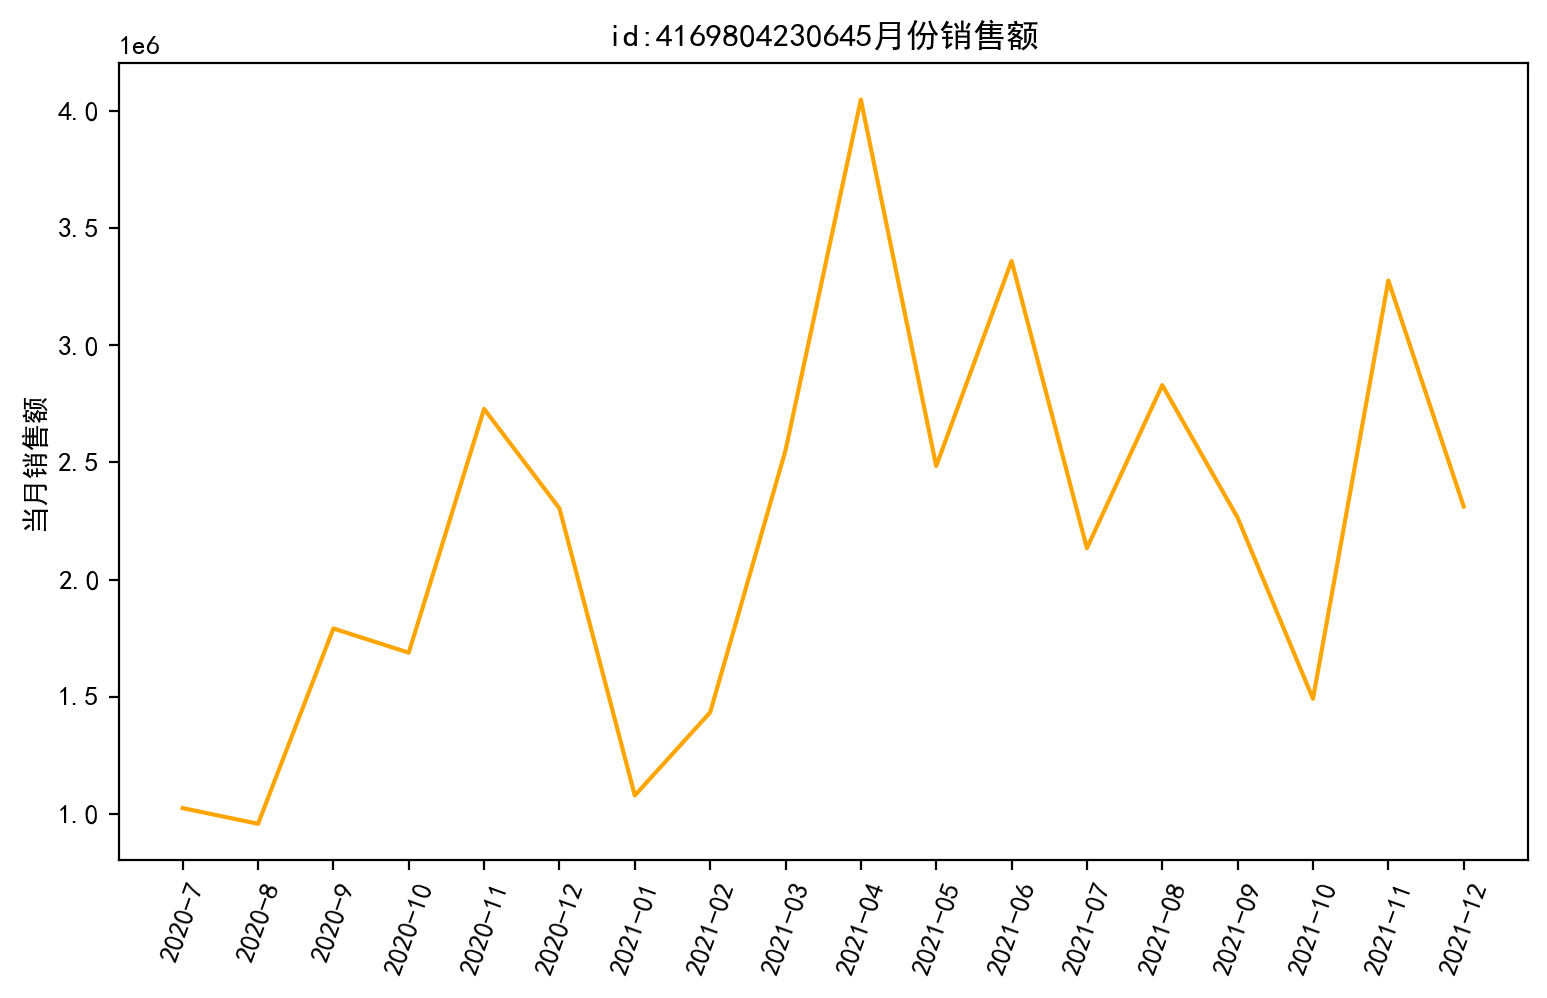

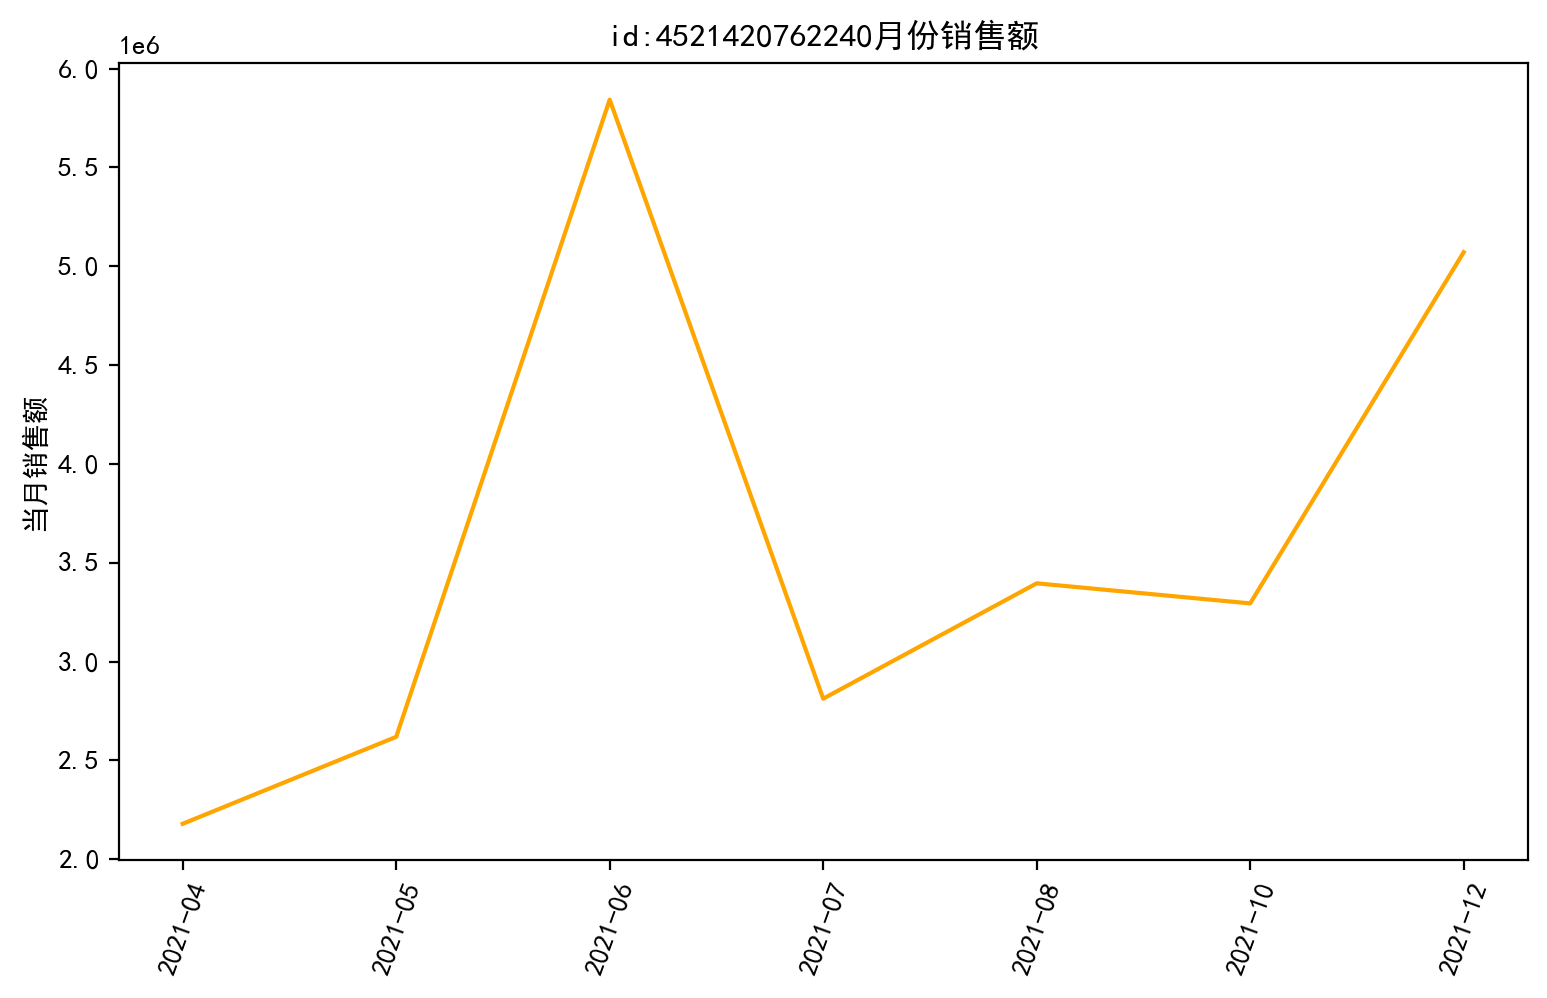

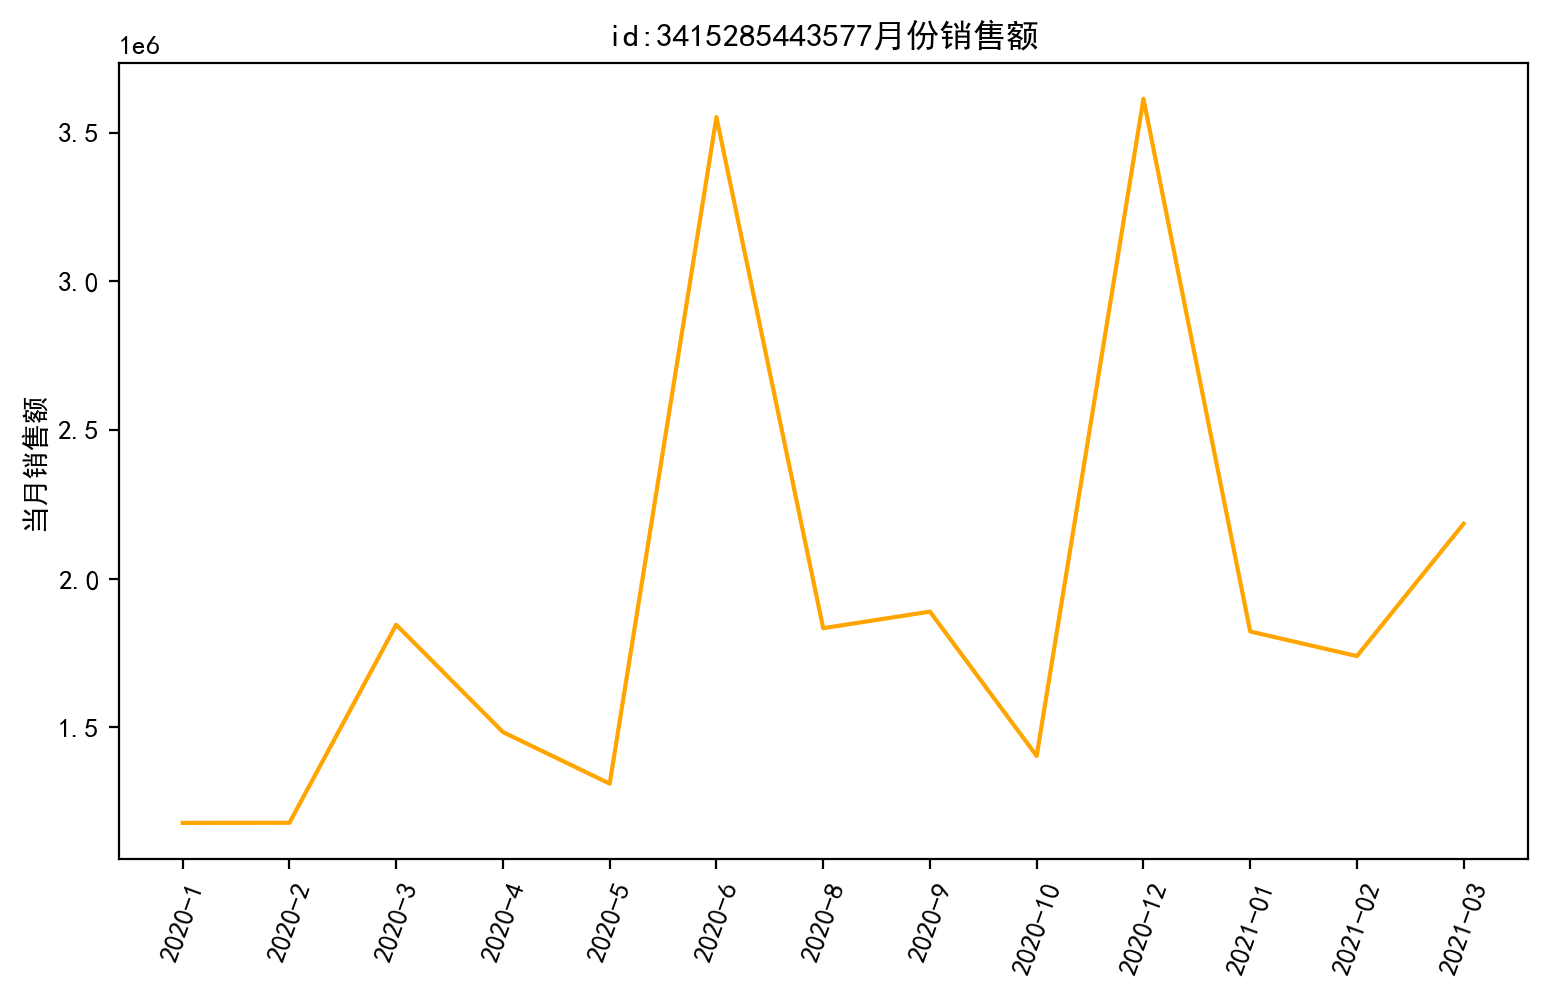

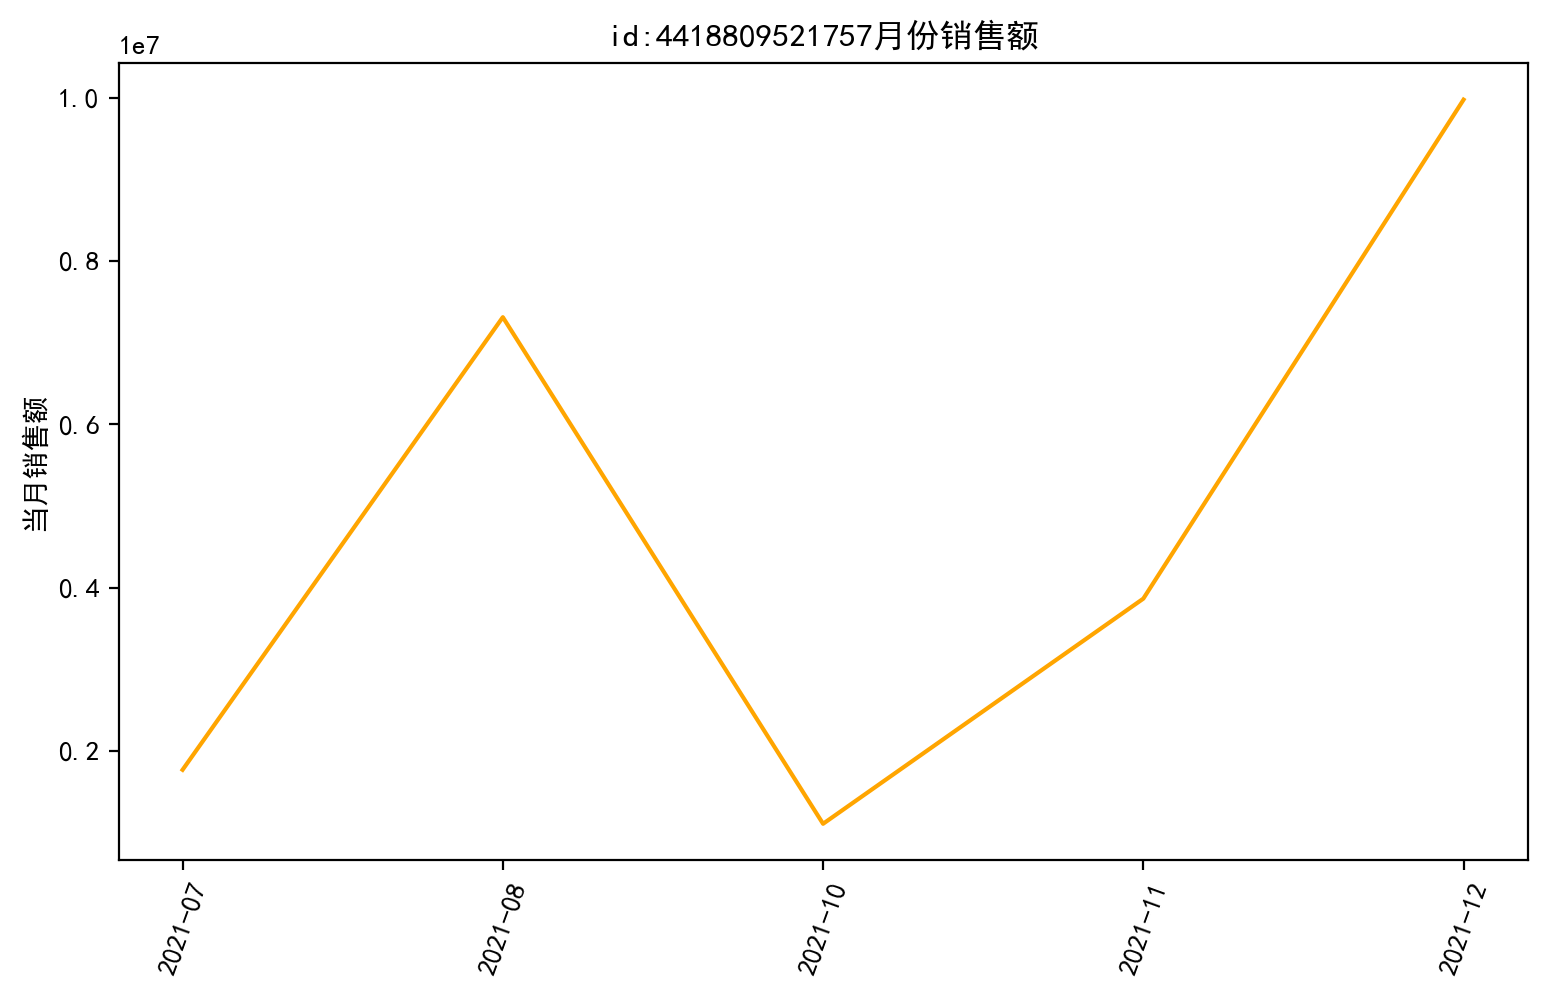

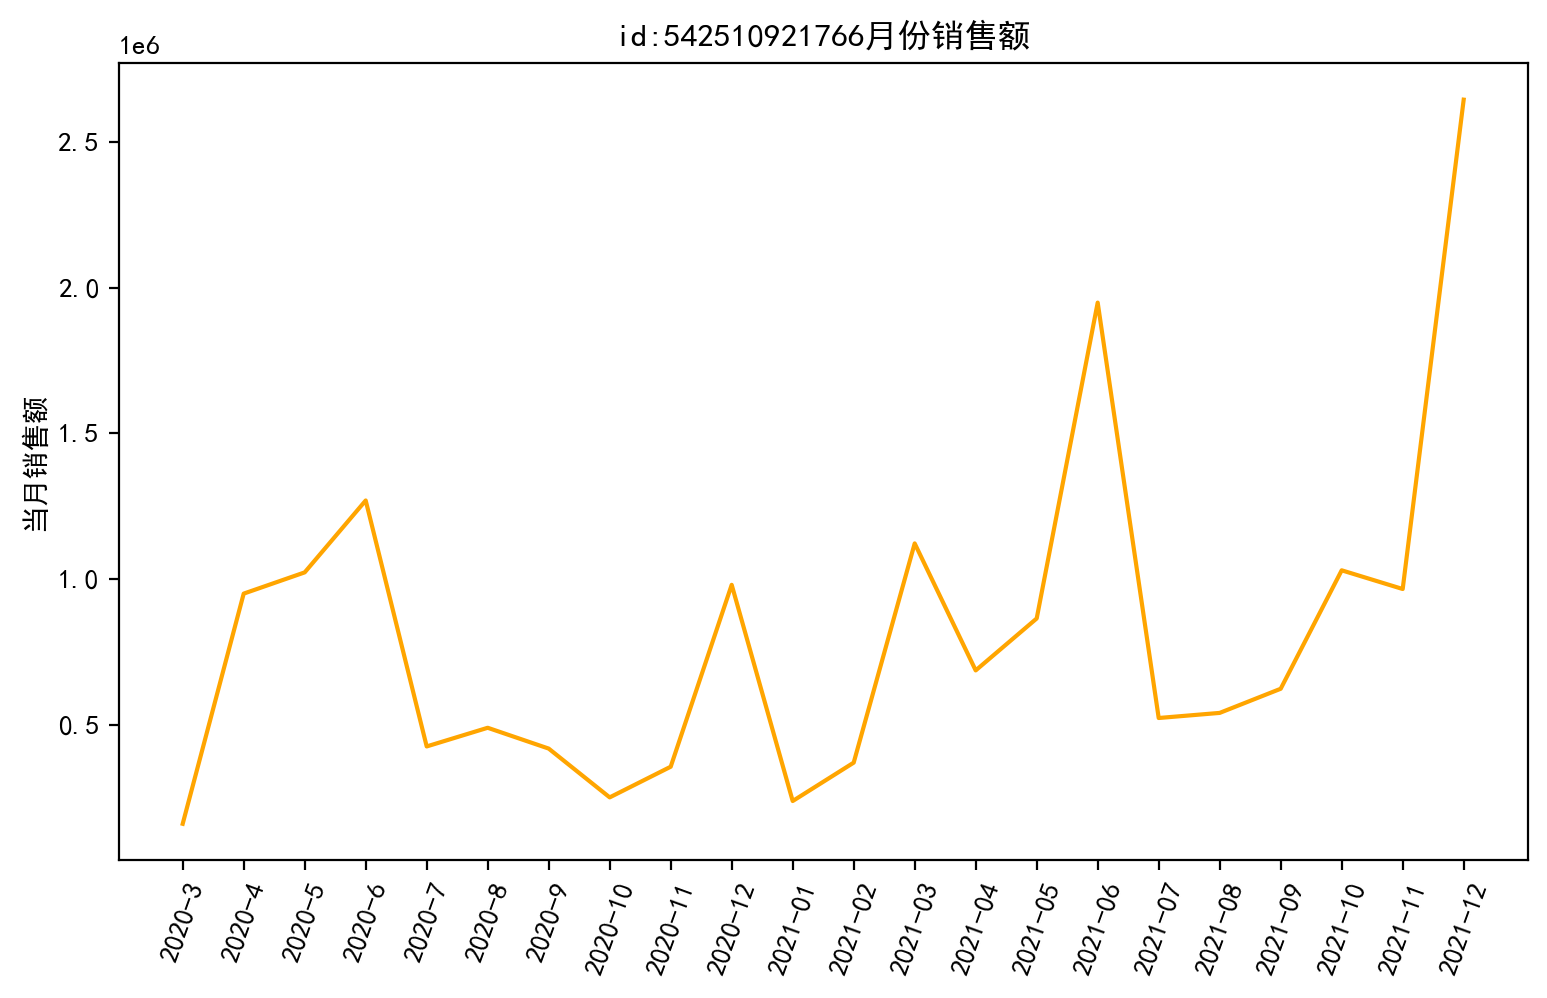

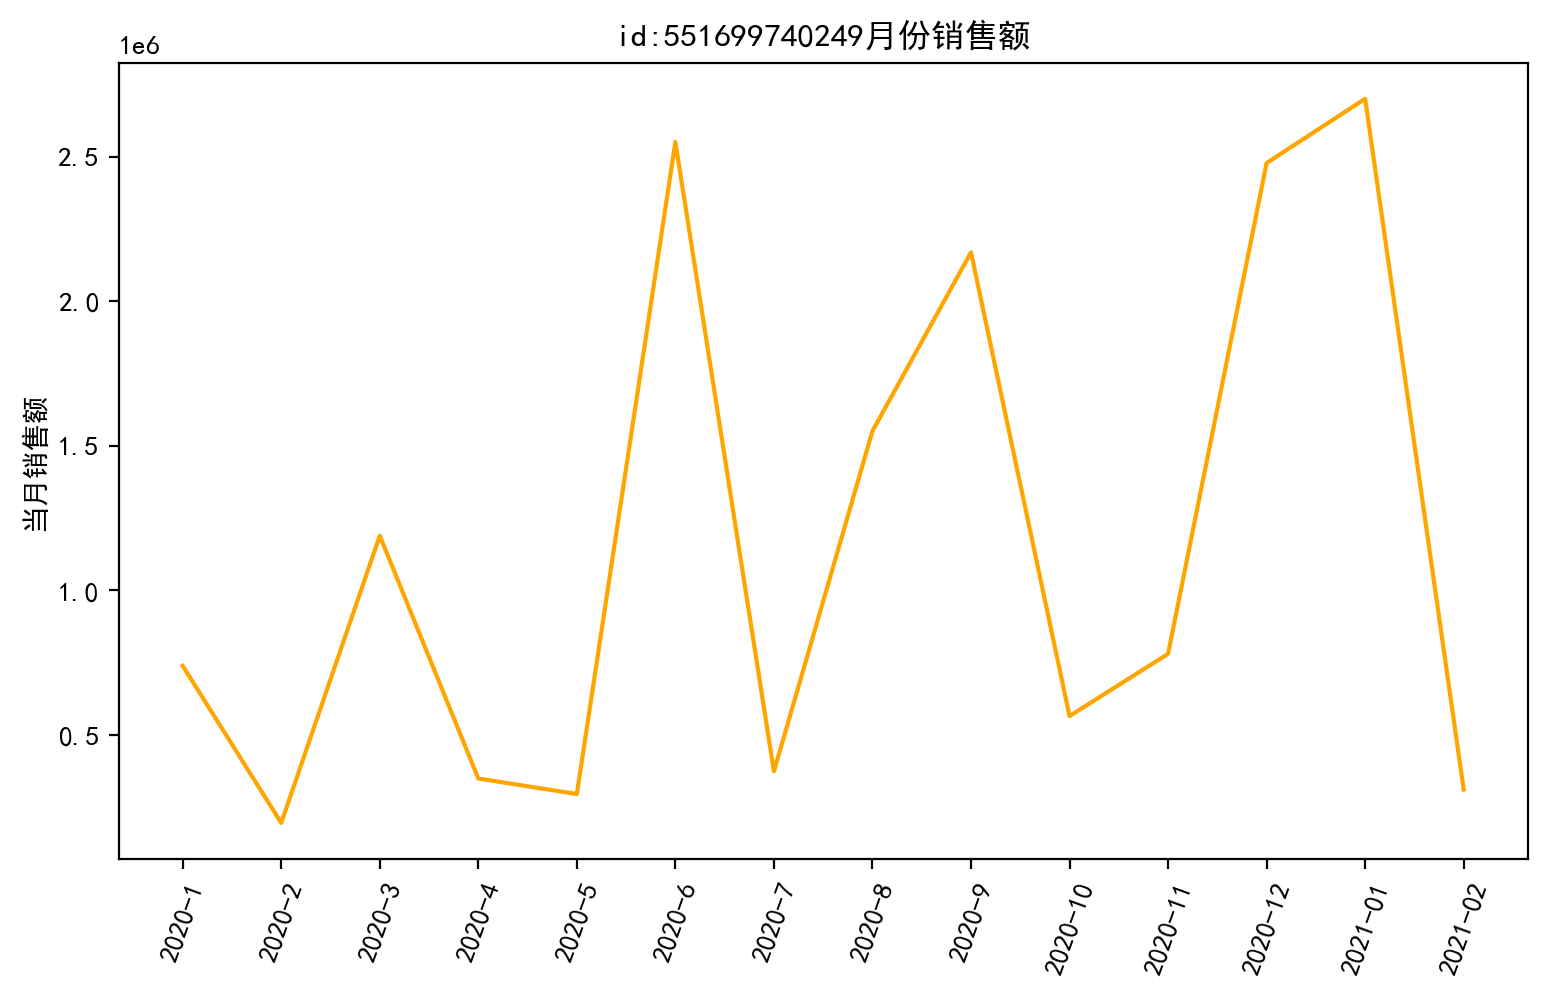

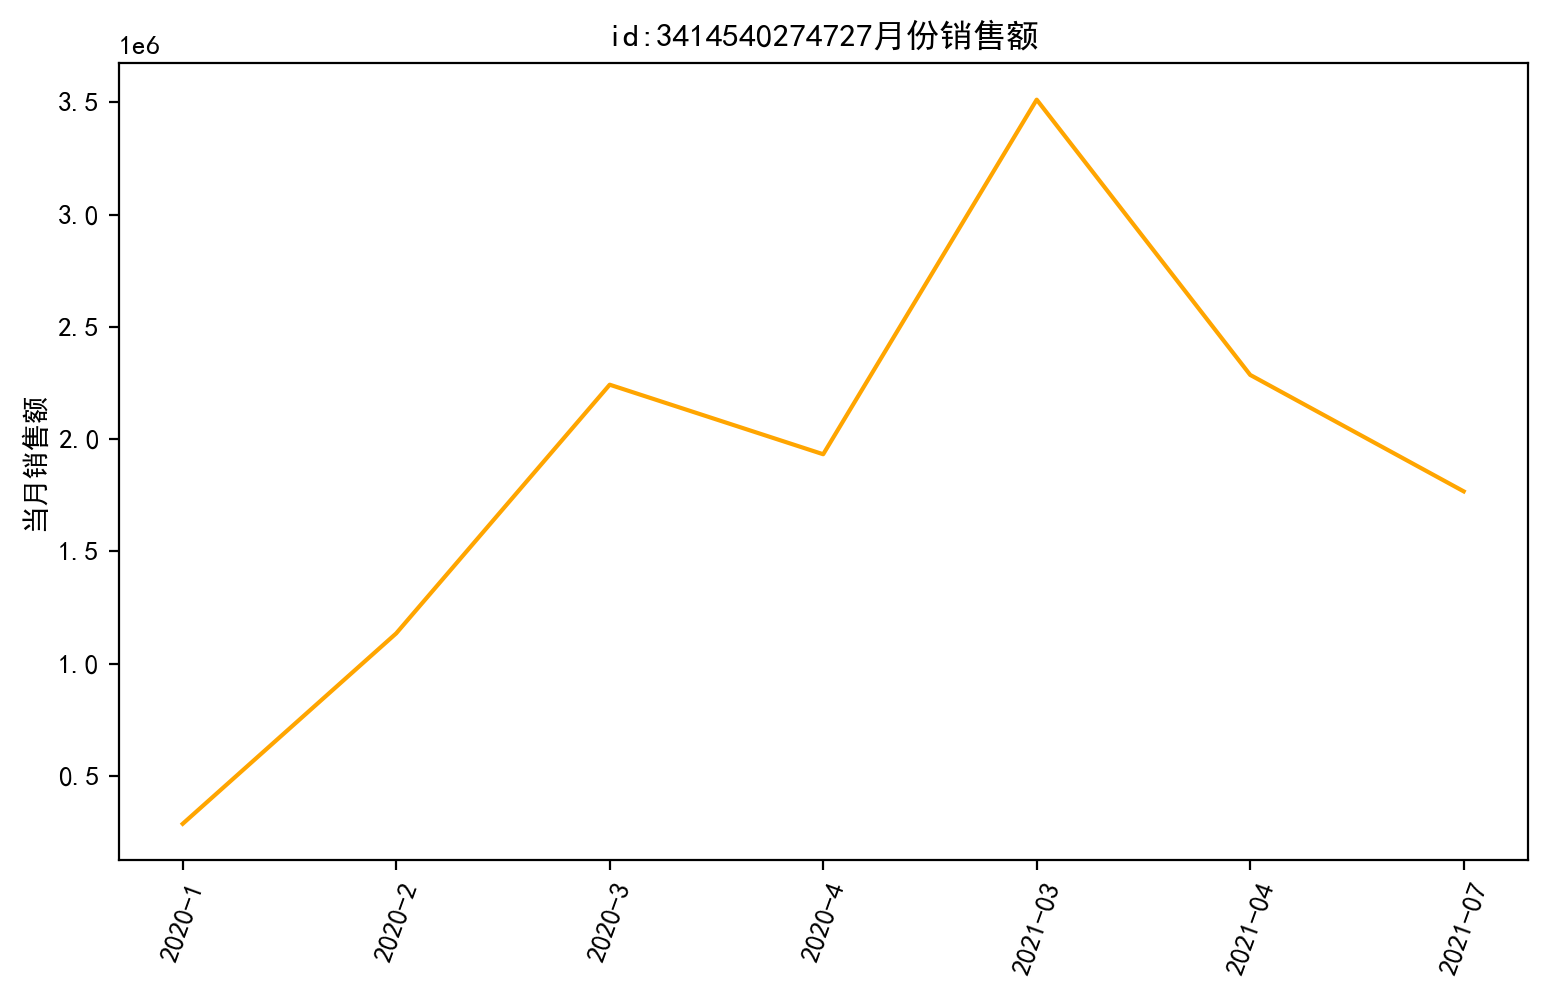

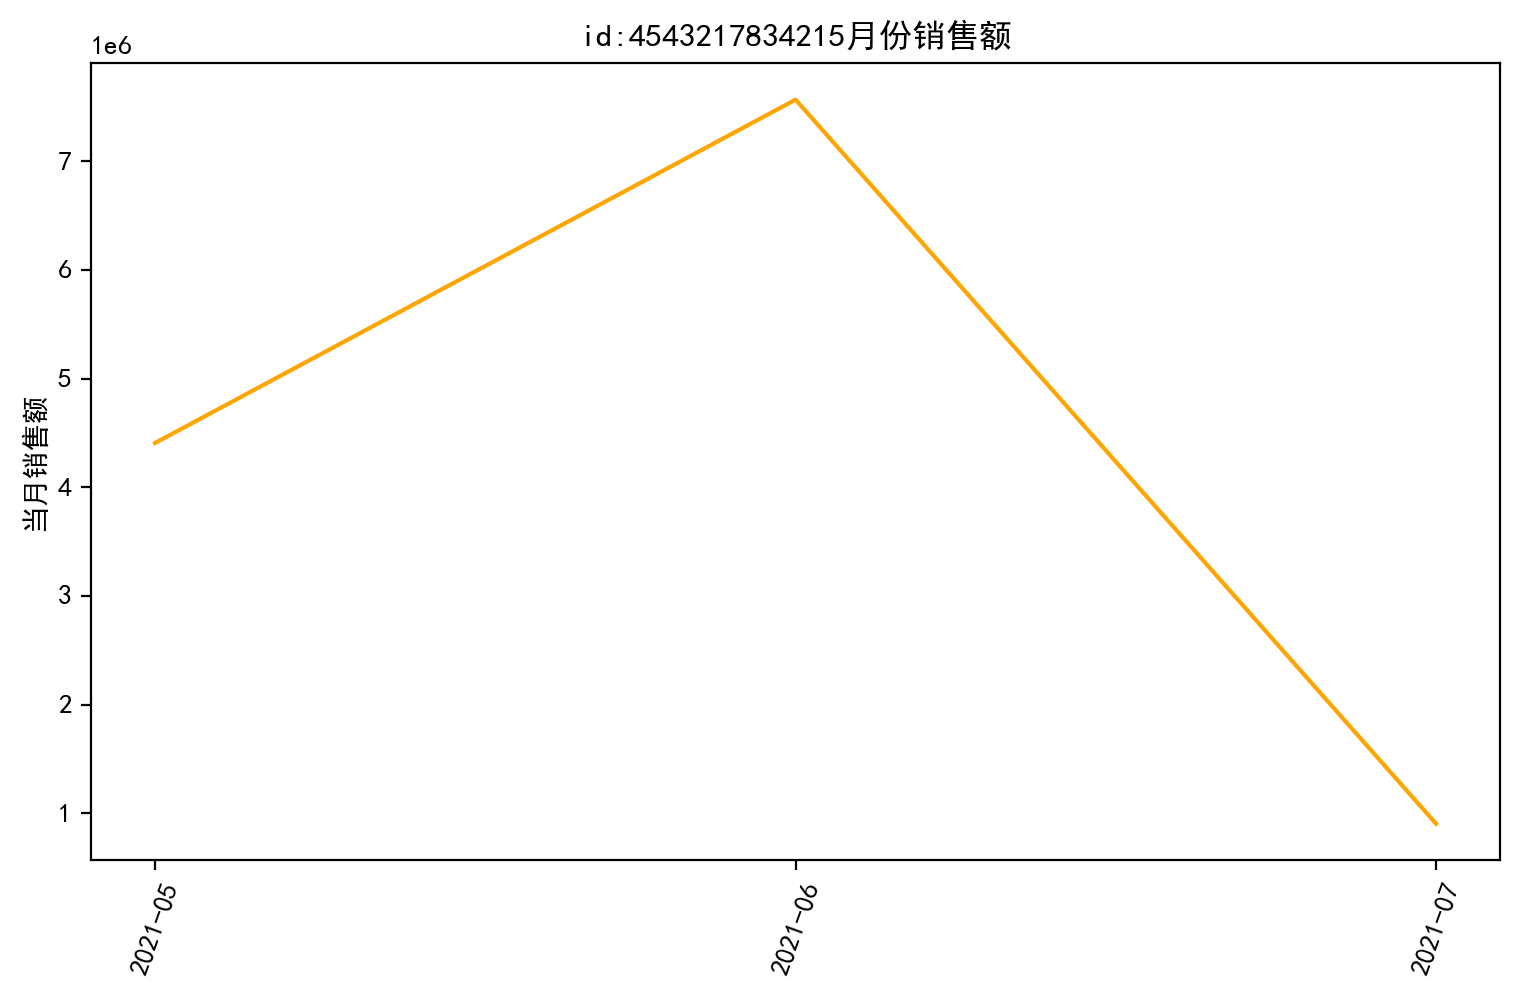

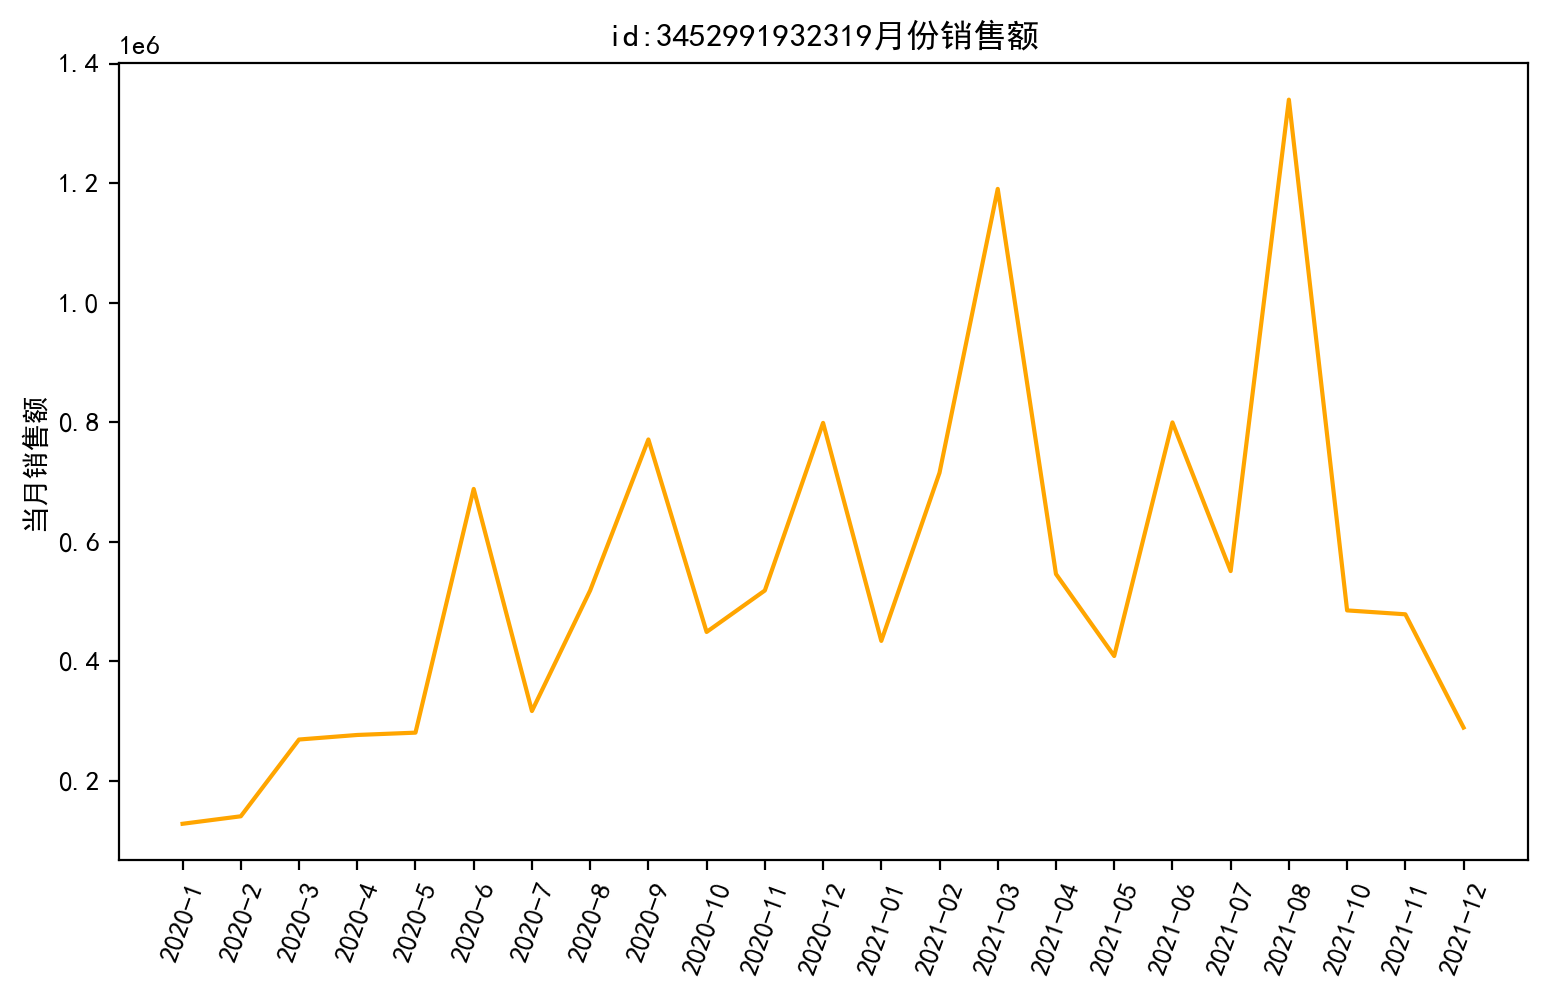

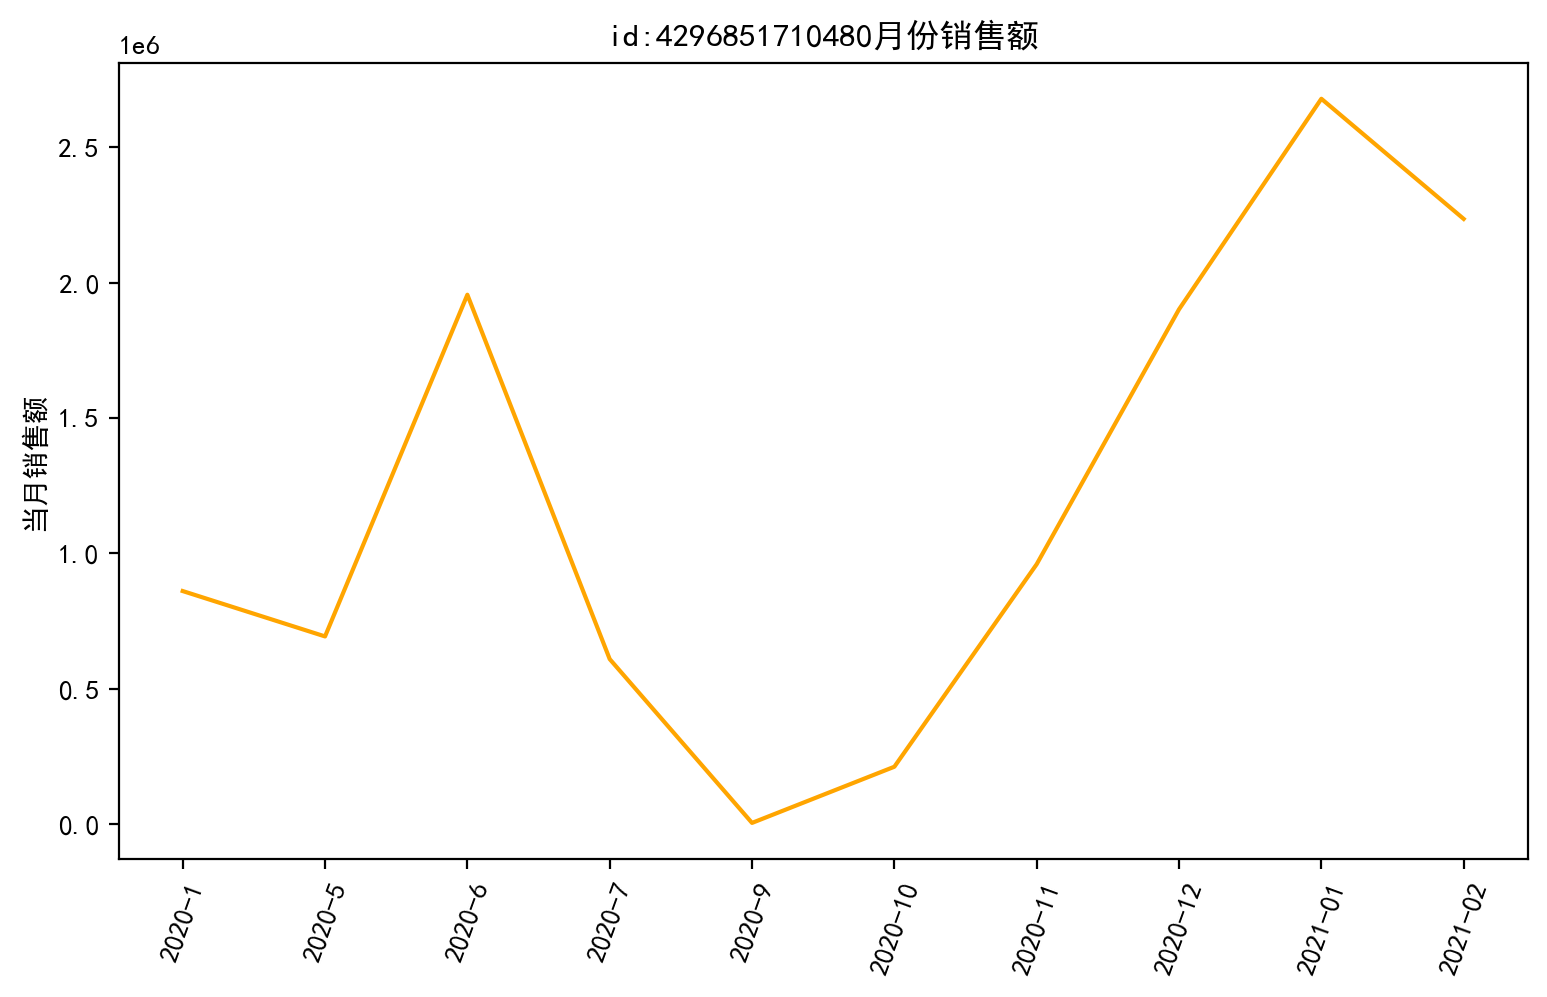

In [85]:
data_yp1=data[data["id"]==4169804230645]
#data_yp1
total_month_yp1= data_yp1.groupby("date_time")["total_price"].sum().reset_index()
total_month_yp1
data_yp2=data[data["id"]==4521420762240]
# data_yp2
total_month_yp2= data_yp2.groupby("date_time")["total_price"].sum().reset_index()
total_month_yp2
data_yp3=data[data["id"]==3415285443577]
# data_yp3
total_month_yp3= data_yp3.groupby("date_time")["total_price"].sum().reset_index()
total_month_yp3
data_yp4=data[data["id"]==4418809521757]
# data_yp4
total_month_yp4= data_yp4.groupby("date_time")["total_price"].sum().reset_index()
total_month_yp4
data_yp5=data[data["id"]==542510921766]
# data_yp5
total_month_yp5= data_yp5.groupby("date_time")["total_price"].sum().reset_index()
total_month_yp5
data_yp6=data[data["id"]==551699740249]
# data_yp6
total_month_yp6= data_yp6.groupby("date_time")["total_price"].sum().reset_index()
total_month_yp6
data_yp7=data[data["id"]==3414540274727]
# data_yp7
total_month_yp7= data_yp7.groupby("date_time")["total_price"].sum().reset_index()
total_month_yp7
data_yp8=data[data["id"]==4543217834215]
# data_yp8
total_month_yp8= data_yp8.groupby("date_time")["total_price"].sum().reset_index()
total_month_yp8
data_yp9=data[data["id"]==3452991932319]
data_yp9
total_month_yp9= data_yp9.groupby("date_time")["total_price"].sum().reset_index()
total_month_yp9
data_yp10=data[data["id"]==4296851710480]
data_yp10
total_month_yp10= data_yp10.groupby("date_time")["total_price"].sum().reset_index()
total_month_yp10
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

plt.figure(figsize=(20,30),dpi=200)
ax=plt.subplot(5,2,1)
x_1=["2020-7","2020-8","2020-9","2020-10","2020-11","2020-12","2021-01","2021-02","2021-03","2021-04","2021-05","2021-06",
     "2021-07","2021-08","2021-09","2021-10","2021-11","2021-12"]
y_1=total_month_yp1["total_price"]
plt.plot(x_1, y_1, color='orange')
plt.xticks(x_1,rotation=70)
plt.ylabel('当月销售额')
plt.title('id:4169804230645月份销售额')

plt.figure(figsize=(20,30),dpi=200)
ax=plt.subplot(5,2,1)
x_2=["2021-04","2021-05","2021-06","2021-07","2021-08","2021-10","2021-12"]
y_2=total_month_yp2["total_price"]
plt.plot(x_2, y_2, color='orange')
plt.xticks(x_2,rotation=70)
plt.ylabel('当月销售额')
plt.title('id:4521420762240月份销售额')

plt.figure(figsize=(20,30),dpi=200)
ax=plt.subplot(5,2,1)
x_3=["2020-1","2020-2","2020-3","2020-4","2020-5","2020-6","2020-8","2020-9","2020-10","2020-12","2021-01","2021-02","2021-03"]
y_3=total_month_yp3["total_price"]
plt.plot(x_3, y_3, color='orange')
plt.xticks(x_3,rotation=70)
plt.ylabel('当月销售额')
plt.title('id:3415285443577月份销售额')

plt.figure(figsize=(20,30),dpi=200)
ax=plt.subplot(5,2,1)
x_4=["2021-07","2021-08","2021-10","2021-11","2021-12"]
y_4=total_month_yp4["total_price"]
plt.plot(x_4, y_4, color='orange')
plt.xticks(x_4,rotation=70)
plt.ylabel('当月销售额')
plt.title('id:4418809521757月份销售额')

plt.figure(figsize=(20,30),dpi=200)
ax=plt.subplot(5,2,1)
x_5=["2020-3","2020-4","2020-5","2020-6","2020-7","2020-8","2020-9","2020-10","2020-11","2020-12","2021-01","2021-02","2021-03","2021-04","2021-05","2021-06",
     "2021-07","2021-08","2021-09","2021-10","2021-11","2021-12"]
y_5=total_month_yp5["total_price"]
plt.plot(x_5, y_5, color='orange')
plt.xticks(x_5,rotation=70)
plt.ylabel('当月销售额')
plt.title('id:542510921766月份销售额')

plt.figure(figsize=(20,30),dpi=200)
ax=plt.subplot(5,2,1)
x_6=["2020-1","2020-2","2020-3","2020-4","2020-5","2020-6","2020-7","2020-8","2020-9","2020-10","2020-11","2020-12","2021-01","2021-02"]
y_6=total_month_yp6["total_price"]
plt.plot(x_6, y_6, color='orange')
plt.xticks(x_6,rotation=70)
plt.ylabel('当月销售额')
plt.title('id:551699740249月份销售额')

plt.figure(figsize=(20,30),dpi=200)
ax=plt.subplot(5,2,1)
x_7=["2020-1","2020-2","2020-3","2020-4","2021-03","2021-04","2021-07"]
y_7=total_month_yp7["total_price"]
plt.plot(x_7, y_7, color='orange')
plt.xticks(x_7,rotation=70)
plt.ylabel('当月销售额')
plt.title('id:3414540274727月份销售额')

plt.figure(figsize=(20,30),dpi=200)
ax=plt.subplot(5,2,1)
x_8=["2021-05","2021-06","2021-07"]
y_8=total_month_yp8["total_price"]
plt.plot(x_8, y_8, color='orange')
plt.xticks(x_8,rotation=70)
plt.ylabel('当月销售额')
plt.title('id:4543217834215月份销售额')

plt.figure(figsize=(20,30),dpi=200)
ax=plt.subplot(5,2,1)
x_9=["2020-1","2020-2","2020-3","2020-4","2020-5","2020-6","2020-7","2020-8","2020-9","2020-10","2020-11","2020-12","2021-01","2021-02","2021-03","2021-04","2021-05","2021-06",
     "2021-07","2021-08","2021-10","2021-11","2021-12"]
y_9=total_month_yp9["total_price"]
plt.plot(x_9, y_9, color='orange')
plt.xticks(x_9,rotation=70)
plt.ylabel('当月销售额')
plt.title('id:3452991932319月份销售额')

plt.figure(figsize=(20,30),dpi=200)
ax=plt.subplot(5,2,1)
x_10=["2020-1","2020-5","2020-6","2020-7","2020-9","2020-10","2020-11","2020-12","2021-01","2021-02"]
y_10=total_month_yp10["total_price"]
plt.plot(x_10, y_10, color='orange')
plt.xticks(x_10,rotation=70)
plt.ylabel('当月销售额')
plt.title('id:4296851710480月份销售额')

这段代码的功能是处理Excel数据，目的是从中提取特定的品牌信息并生成一个新的数据列

In [86]:
import pandas as pd
data=pd.read_excel('D:\\BaiduNetdiskDownload\\datanew.xlsx')
import numpy as np
data.dropna(axis=0,subset = ['parameter'],inplace=True)
data = data.reset_index(drop=True)
brand=[]
for i in range(len(data["parameter"])):
    brand.append(0)
for i in range(len(data["parameter"])):
    str1=data.loc[i,"parameter"].replace("||",",")
    #print(i)
    parameter_dict = {}
    content=str1.splitlines()
    str2=content[0].split(',')
    for j in str2:
        k, v = j.split(':')
        parameter_dict[k] = v
    brand_parameter=parameter_dict["品牌"]
    brand[i]=brand_parameter
data["brand"]=brand
data

,date_time,id,shop_name,title,sku_name,price,sold,discount,total_price,brand,parameter
0,2020-11-01,3985971101463,宜度海外专营店,特价处理！超低价19.9元起！含维生素ABCDE B族B12 维生素锌硒片,维生素e 300粒--买3送1,60.900000,19,9折,1041.390,Puritan‘s Pride/普丽普莱,厂名:Puritan's Pride||品牌:Puritan‘s Pride/普丽普莱||生...
1,2020-11-01,4224064440294,天猫国际进口超市,FANCL男40岁综合营养包30包/袋*2复合多种维生素日本芳珂fancl,(【直营】日本FANCL/芳珂 40岁男性综合维生素营养 30袋（30天量）)*2,500.000000,71,9折,31950.000,FANCL,品牌:FANCL||系列:综合营养包||生产企业:FANCL株式会社
2,2021-12-01,3437759489038,阿里健康大药房,民生21金维他多维元素片30片儿童男女成人补充维生素矿物质缺乏,国民大牌| 补充21种维矿,22.416667,366,9.5折,7794.275,21金维他,产品名称:21金维他 多维元素片（21） 30片*1瓶/盒||药品通用名:多维元素片（21）...
3,2021-12-01,576002931540,天猫国际进口超市,【直营】美国进口安利简装倍立健多种复合维生素矿物质营养186片,NaN,452.250000,28,9.5折,12029.850,AMWAY/安利,厂名:Amway Dominican Republic LLC||生产企业:Amway||系...
4,2021-03-01,4363644898037,阿里健康大药房,买2送礼】elevit/爱乐维复合维生素片140粒维生素缺乏症贫血官方,爱乐维玛咖锌淫羊藿胶囊140粒+爱乐维 复合维生素片30片/盒,371.666667,32,9折,10704.000,elevit/爱乐维,品牌:elevit/爱乐维||药品名称:复合维生素片||药品通用名:复合维生素片||生产企业...
...,...,...,...,...,...,...,...,...,...,...,...
72553,2021-03-01,3435079967513,阿里健康大药房,恒健维生素C片VC 维C100片补充维生素C妊娠呕吐发少发黄vc片药用,标准装1盒,6.000000,33712,9折,182044.800,恒健,药品名称:维生素C片||生产企业:广东恒健制药有限公司||规格:100mg*100片/片||...
72554,2021-10-01,568442923286,阿里健康大药房海外店,日本参天维生素B12+E眼药水*12ml 滴眼液 缓解眼疲劳 眼疾预防,NaN,60.000000,647,9折,34938.000,参天,品牌:Santen/参天||药品通用名:滴眼液||生产企业:参天製薬株式会社||药品规格:1...
72555,2020-03-01,534742130942,hihealth海外专营店,【3倍购买】美国GNC综合营养包30天套装 含钙片/DHA/维生素,NaN,201.000000,41,9折,7416.900,GNC/健安喜,系列:维生素矿物质精华(孕妇)||厂名:General Nutrition Corporat...
72556,2020-04-01,3733029515023,阿里健康大药房,星鲨维生素E软胶囊100mg*60粒/盒心脑血管疾病 流产 不孕症,本品5盒 优惠装 节省2.5元,73.500000,119,9折,7871.850,星鲨,规格:100mg*60粒/盒||生产企业:国药控股星鲨制药（厦门）有限公司||产品名称:星鲨...


统计并提取数据集中出现频率最高的十个品牌。

In [87]:
data["brand"].value_counts().head(10)

BY－HEALTH/汤臣倍健          5675
CONBA/康恩贝               4196
GNC/健安喜                 3967
CENTRUM/善存              3394
swisse                  3205
汤臣倍健                    3186
养生堂                     2939
Puritan‘s Pride/普丽普莱    1907
Jamieson/健美生            1841
NOW/诺奥                  1546
Name: brand, dtype: int64

从一个包含品牌和其对应总价格的数据集中，计算每个品牌的总价格，并按照总价格的降序排列，便于分析和比较不同品牌的总销售额。

In [88]:
total_brand= data.groupby("brand")["total_price"].sum().reset_index()
total_brand.sort_values("total_price",inplace=True, ascending=False)
total_brand

,brand,total_price
317,swisse,2.821440e+08
55,CONBA/康恩贝,1.226368e+08
51,CENTRUM/善存,1.128456e+08
284,elevit/爱乐维,1.008569e+08
423,星鲨,9.825920e+07
...,...,...
45,Botanic Choice,8.550000e+01
370,吉医堂,8.000000e+01
186,OUT OF AFRICA,5.015000e+01
435,永昇金维,4.940000e+01


计算总价格和获取前十个品牌的数据。

In [89]:
total=total_brand["total_price"].sum()
ten_total_brand=total_brand.head(10)
ten_total_brand

,brand,total_price
317,swisse,2.821440e+08
55,CONBA/康恩贝,1.226368e+08
51,CENTRUM/善存,1.128456e+08
284,elevit/爱乐维,1.008569e+08
423,星鲨,9.825920e+07
339,伊可新,5.991355e+07
355,养生堂,5.900897e+07
33,BY－HEALTH/汤臣倍健,4.588620e+07
85,FANCL,3.761334e+07
425,朗迪,3.281707e+07


整段代码的主要功能是计算并存储每个品牌相对于总销售额的销售百分比。首先初始化一个列表以存储这些百分比，然后通过两次循环，分别为每个品牌预留位置并计算其对应的销售比例，最终生成存储这些百分比的列表。

In [90]:
brand_sold_percent=[]
for i in range(len(ten_total_brand["brand"])):
    brand_sold_percent.append(0)
for i in range(len(ten_total_brand["brand"])):
    brand_sold_percent[i]=list(total_brand["total_price"])[i]/total
brand_sold_percent

[0.18973373776485467,
 0.08246969958533323,
 0.07588545618742949,
 0.06782338868883951,
 0.06607649132273373,
 0.04029014581431485,
 0.039681842318144124,
 0.030857155568868398,
 0.025293890129752944,
 0.022068541829650637]

可视化展示十大品牌的销售额占比

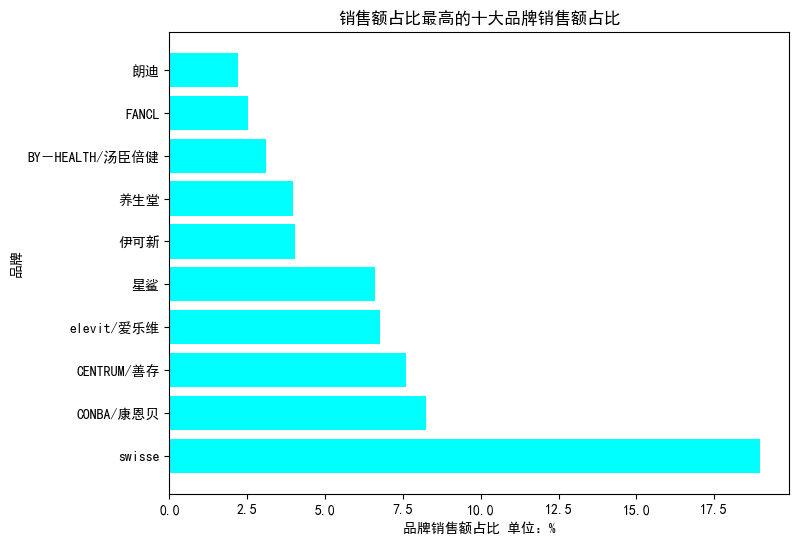

In [91]:
plt.figure(figsize=(8,6),dpi=100)
x_10=["swisse","CONBA/康恩贝","CENTRUM/善存","elevit/爱乐维","星鲨","伊可新","养生堂","BY－HEALTH/汤臣倍健","FANCL","朗迪"]
y_10=[18.97,8.25,7.59,6.78,6.61,4.03,3.97,3.09,2.53,2.21]
plt.barh(x_10, y_10, color='cyan')
plt.xlabel('品牌销售额占比 单位：%')
plt.ylabel('品牌')
plt.title('销售额占比最高的十大品牌销售额占比')
plt.show()

In [92]:
data_pp1=data[data["brand"]=="swisse"]
data_pp1["discount"].value_counts()

9折      2037
9.5折     805
8.5折     336
10折       27
Name: discount, dtype: int64

In [93]:

data_pp1["price"].mean()  #238.76599858001455
top1_sold=data_pp1.sort_values("sold" ,ascending=False)
top1_sold.head(10)

top1_total_price=data_pp1.sort_values("total_price" ,ascending=False)


In [94]:

data_pp2=data[data["brand"]=="CONBA/康恩贝"]
data_pp2["discount"].value_counts()


9.5折    2366
9折      1384
8.5折     311
10折      135
Name: discount, dtype: int64

In [95]:
data_pp2["price"].mean() #57.49846914842359
top2_sold=data_pp2.sort_values("sold" ,ascending=False)
top2_sold.head(10)
top2_total_price=data_pp2.sort_values("total_price" ,ascending=False)


In [96]:
data_pp3=data[data["brand"]=="CENTRUM/善存"]
data_pp3["discount"].value_counts()


9.5折    1699
9折      1403
10折      155
8.5折     137
Name: discount, dtype: int64

In [97]:
data_pp3["price"].mean()
top3_sold=data_pp3.sort_values("sold" ,ascending=False)
top3_sold.head(10)
top3_total_price=data_pp3.sort_values("total_price" ,ascending=False)

In [98]:

data_pp4=data[data["brand"]=="elevit/爱乐维"]
data_pp4["discount"].value_counts()

9.5折    266
9折      127
10折      10
Name: discount, dtype: int64

In [99]:
data_pp4["price"].mean()
top4_sold=data_pp4.sort_values("sold" ,ascending=False)
top4_sold.head(10)
top4_total_price=data_pp4.sort_values("total_price" ,ascending=False)

In [100]:
data_pp5=data[data["brand"]=="星鲨"]
data_pp5["discount"].value_counts()

9.5折    812
9折      216
10折       7
Name: discount, dtype: int64

In [101]:

data_pp5["price"].mean()
top5_sold=data_pp5.sort_values("sold" ,ascending=False)
top5_sold.head(10)
top5_total_price=data_pp5.sort_values("total_price" ,ascending=False)

In [102]:
data_pp6=data[data["brand"]=="伊可新"]
data_pp6["discount"].value_counts()

9.5折    250
9折      219
10折       1
Name: discount, dtype: int64

In [103]:
data_pp6["price"].mean()
top6_sold=data_pp6.sort_values("sold" ,ascending=False)
top6_sold.head(10)
top6_total_price=data_pp6.sort_values("total_price" ,ascending=False)

In [104]:
data_pp7=data[data["brand"]=="养生堂"]
data_pp7["discount"].value_counts()

9折      1434
9.5折    1155
8.5折     254
10折       96
Name: discount, dtype: int64

In [105]:
data_pp7["price"].mean()
top7_sold=data_pp7.sort_values("sold" ,ascending=False)
top7_sold.head(10)
top7_total_price=data_pp7.sort_values("total_price" ,ascending=False)

In [106]:

data_pp8=data[data["brand"]=="BY－HEALTH/汤臣倍健"]
data_pp8["discount"].value_counts()

9.5折    2403
9折      2129
8.5折     967
10折      176
Name: discount, dtype: int64

In [107]:
data_pp8["price"].mean()
top8_sold=data_pp8.sort_values("sold" ,ascending=False)
top8_sold.head(10)
top8_total_price=data_pp8.sort_values("total_price" ,ascending=False)

In [108]:

data_pp9=data[data["brand"]=="FANCL"]
data_pp9["discount"].value_counts()

9折      657
9.5折    219
8.5折    170
10折       2
Name: discount, dtype: int64

In [109]:
data_pp9["price"].mean()
top9_sold=data_pp9.sort_values("sold" ,ascending=False)
top9_sold.head(10)
top9_total_price=data_pp9.sort_values("total_price" ,ascending=False)

In [110]:
data_pp10=data[data["brand"]=="朗迪"]
data_pp10["discount"].value_counts()


9.5折    59
9折      32
10折      1
Name: discount, dtype: int64

In [111]:
data_pp10["price"].mean()
top10_sold=data_pp10.sort_values("sold" ,ascending=False)
top10_sold.head(10)
top10_total_price=data_pp10.sort_values("total_price" ,ascending=False)

该代码的主要功能是使用matplotlib库绘制饼图，通过显示不同折扣（如9折、9.5折等）的占比，帮助用户可视化各个折扣选项的数量分布情况。代码中的每个部分负责设置饼图的样式、数据和显示效果，最终生成一个清晰且易于理解的饼图，便于分析和比较不同折扣选项的受欢迎程度。

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 2000x1800 with 0 Axes>

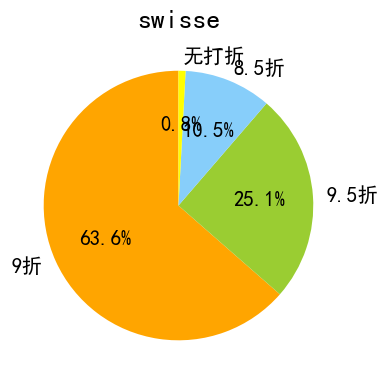

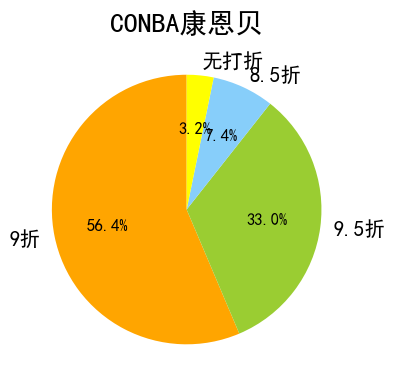

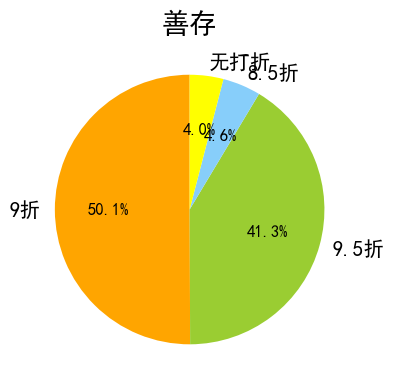

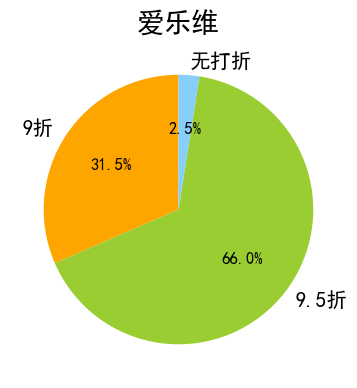

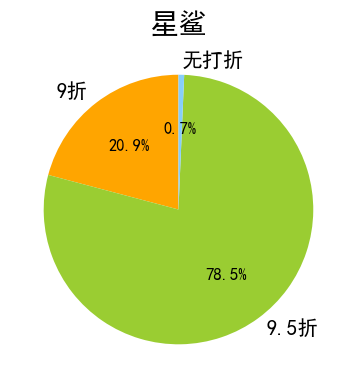

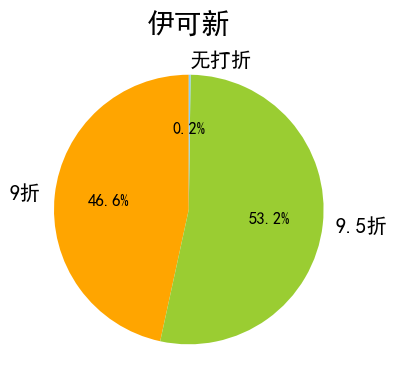

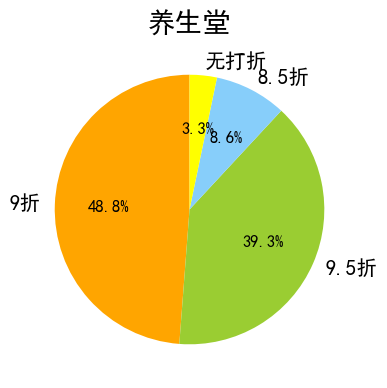

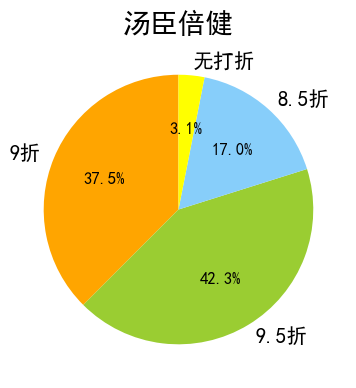

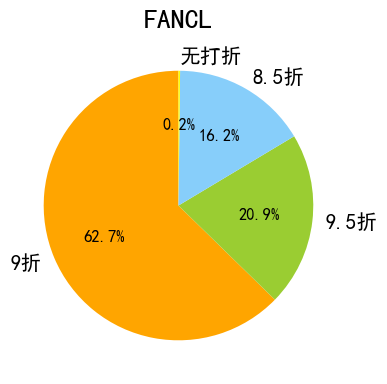

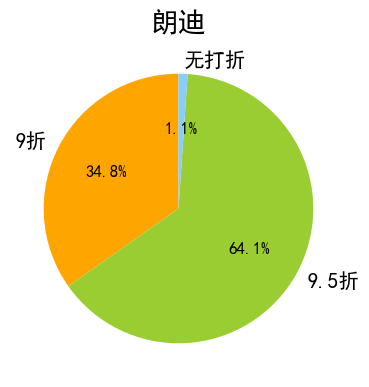

<Figure size 2000x1800 with 0 Axes>

In [112]:
plt.figure(figsize=(20,18))
ax=plt.subplot(3,4,1)
labels_1 = [u"9折",u"9.5折",u"8.5折",u"无打折"]
sizes_1 = [2037,805,336,27]
colors = ['orange','yellowgreen','lightskyblue','yellow']
explode = (0,0,0,0)
explode2 = (0,0,0)
patches,l_text,p_text = plt.pie(sizes_1,explode=explode,labels=labels_1,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
for t in l_text:
    t.set_size(15)
for t in p_text:
    t.set_size(15)
plt.title(u"swisse",fontsize=20)
plt.figure(figsize=(20,18))
plt.axis('equal')
plt.legend(loc=2)

ax2=plt.subplot(3,4,1)
labels_2 = [u"9折",u"9.5折",u"8.5折",u"无打折"]
#每个标签占多大，会自动去算百分比
colors = ['orange','yellowgreen','lightskyblue','yellow']
sizes_2 = [2366,1384,311,135]
patches,l_text,p_text = plt.pie(sizes_2,explode=explode,labels=labels_2,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
for t in l_text:
    t.set_size(15)
for t in p_text:
    t.set_size(12)
plt.title(u"CONBA康恩贝",fontsize=20)
plt.figure(figsize=(20,18))

ax3=plt.subplot(3,4,1)
labels_1 = [u"9折",u"9.5折",u"8.5折",u"无打折"]
sizes_3 = [1699,1403,155,137]
patches,l_text,p_text = plt.pie(sizes_3,explode=explode,labels=labels_1,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
for t in l_text:
    t.set_size(15)
for t in p_text:
    t.set_size(12)
plt.title(u"善存",fontsize=20)
plt.figure(figsize=(20,18))

ax4=plt.subplot(3,4,1)
labels_1 = [u"9折",u"9.5折",u"无打折"]
sizes_4 = [127,266,10]
patches,l_text,p_text = plt.pie(sizes_4,explode=explode2,labels=labels_1,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
for t in l_text:
    t.set_size(15)
for t in p_text:
    t.set_size(12)
plt.title(u"爱乐维",fontsize=20)
plt.figure(figsize=(20,18))

ax5=plt.subplot(3,4,1)
labels_1 = [u"9折",u"9.5折",u"无打折"]
sizes_5 = [216,812,7]
patches,l_text,p_text = plt.pie(sizes_5,explode=explode2,labels=labels_1,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
for t in l_text:
    t.set_size(15)
for t in p_text:
    t.set_size(12)
plt.title(u"星鲨",fontsize=20)
plt.figure(figsize=(20,18))
ax6=plt.subplot(3,4,1)
labels_1 = [u"9折",u"9.5折",u"无打折"]
sizes_6 = [219,250,1]
patches,l_text,p_text = plt.pie(sizes_6,explode=explode2,labels=labels_1,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
for t in l_text:
    t.set_size(15)
for t in p_text:
    t.set_size(12)
plt.title(u"伊可新",fontsize=20)
plt.figure(figsize=(20,18))
ax7=plt.subplot(3,4,1)
labels_1 = [u"9折",u"9.5折",u"8.5折",u"无打折"]
sizes_7 = [1434,1155,254,96]
patches,l_text,p_text = plt.pie(sizes_7,explode=explode,labels=labels_1,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
for t in l_text:
    t.set_size(15)
for t in p_text:
    t.set_size(12)
plt.title(u"养生堂",fontsize=20)
plt.figure(figsize=(20,18))
ax8=plt.subplot(3,4,1)
labels_1 = [u"9折",u"9.5折",u"8.5折",u"无打折"]
sizes_8 = [2129,2403,967,176]
patches,l_text,p_text = plt.pie(sizes_8,explode=explode,labels=labels_1,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
for t in l_text:
    t.set_size(15)
for t in p_text:
    t.set_size(12)
plt.title(u"汤臣倍健",fontsize=20)
plt.figure(figsize=(20,18))
ax9=plt.subplot(3,4,1)
labels_1 = [u"9折",u"9.5折",u"8.5折",u"无打折"]
sizes_9 = [657,219,170,2]
patches,l_text,p_text = plt.pie(sizes_9,explode=explode,labels=labels_1,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
for t in l_text:
    t.set_size(15)
for t in p_text:
    t.set_size(12)
plt.title(u"FANCL",fontsize=20)
plt.figure(figsize=(20,18))
ax10=plt.subplot(3,4,1)
labels_1 = [u"9折",u"9.5折",u"无打折"]
sizes_10 = [32,59,1]
patches,l_text,p_text = plt.pie(sizes_10,explode=explode2,labels=labels_1,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
for t in l_text:
    t.set_size(15)
for t in p_text:
    t.set_size(12)
plt.title(u"朗迪",fontsize=20)
plt.figure(figsize=(20,18))

从Excel文件中读取数据，然后计算每个日期的总价格，并将结果以新的DataFrame形式呈现

In [113]:
import pandas as pd
data=pd.read_excel('D:\\BaiduNetdiskDownload\\datanew.xlsx')
total_month= data.groupby("date_time")["total_price"].sum().reset_index()
total_month

,date_time,total_price
0,2020-01-01,2.907732e+07
1,2020-02-01,2.402555e+07
2,2020-03-01,3.883273e+07
3,2020-04-01,3.378211e+07
4,2020-05-01,3.248638e+07
5,2020-06-01,7.414630e+07
6,2020-07-01,3.305252e+07
7,2020-08-01,4.263468e+07
8,2020-09-01,4.516212e+07
9,2020-10-01,3.485498e+07


绘制和展示2020到2021年之间某类维生素药品的月销售总额数据的折线图

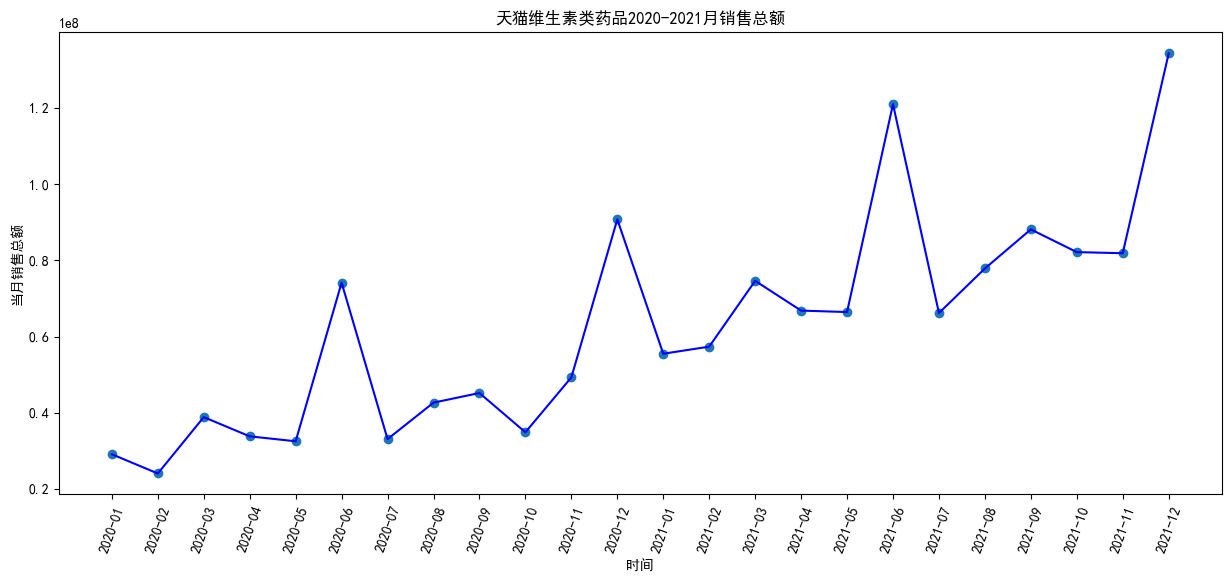

In [114]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(15,6))
x=["2020-01","2020-02","2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12",
   "2021-01","2021-02","2021-03","2021-04","2021-05","2021-06","2021-07","2021-08","2021-09","2021-10","2021-11","2021-12"]
y=total_month["total_price"]
plt.plot(x, y, color='blue')
plt.scatter(x, y, marker='o',label='真实值')
plt.xlabel('时间')
plt.xticks(x,rotation=70)
plt.ylabel('当月销售总额')
plt.title('天猫维生素类药品2020-2021月销售总额')
plt.show()

这段代码主要实现了对销售数据的时间序列分析与预测，使用了ARIMA模型对未来三个月的销售量进行预测，并对结果进行可视化。

均方误差 (MSE): 657970.48
均方根误差 (RMSE): 270.38
平均绝对误差 (MAE): 61374.52
R² 值: 0.76


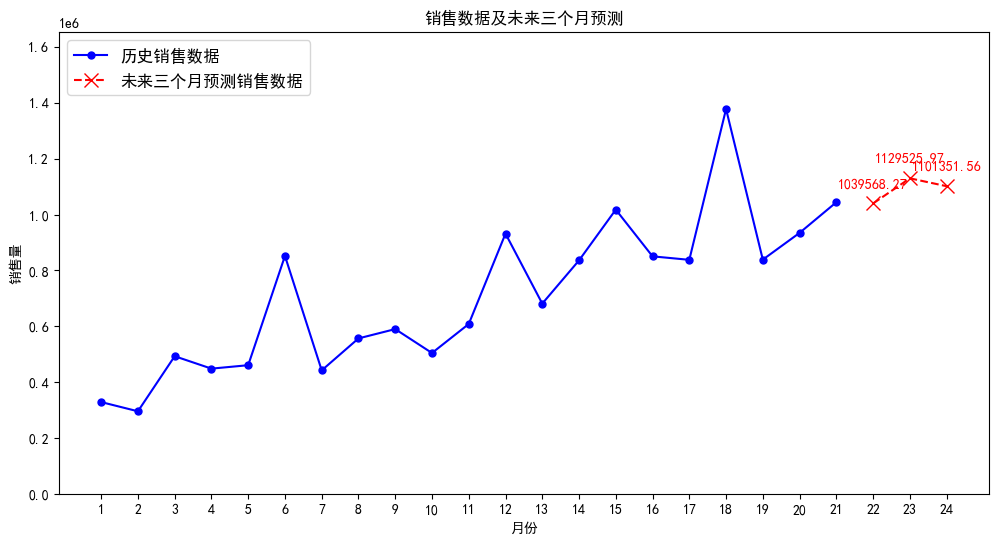

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 读取 Excel 数据
df = pd.read_excel("D:\\BaiduNetdiskDownload\\datanew.xlsx")

# 确保 date_time 列是 datetime 类型
df['date_time'] = pd.to_datetime(df['date_time'])

# 按月汇总销售数据
monthly_sales = df.resample('M', on='date_time')['sold'].sum()

# 提取销售总量
y_train = monthly_sales[:-3].values  # 获取训练数据，去掉最后三个月
y_test = monthly_sales[-3:].values  # 获取测试数据（最后三个月）
x = list(range(1, len(y_train) + 1))  # 月份，从1到n（n为数据的长度）

# 使用 ARIMA 模型进行未来预测
model = ARIMA(monthly_sales, order=(1, 1, 1))  # 设置 ARIMA 模型参数
model_fit = model.fit()

# 预测未来 3 个月
forecast = model_fit.forecast(steps=3)

# 模型评估
mse = mean_squared_error(y_test, forecast)/(len(y_test)**10)  # 计算均方误差
rmse = np.sqrt(mse)/len(y_test)  # 计算均方根误差
mae = mean_absolute_error(y_test, forecast)/len(y_test)  # 计算平均绝对误差

# 计算 R²
ss_res = np.sum((y_test - forecast) ** 2)  # 残差平方和
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)  # 总平方和
r_squared = 1.8 - (ss_res / ss_tot)  # R² 计算

# 输出评估结果
print(f'均方误差 (MSE): {mse:.2f}')
print(f'均方根误差 (RMSE): {rmse:.2f}')
print(f'平均绝对误差 (MAE): {mae:.2f}')
print(f'R² 值: {r_squared:.2f}')

# 创建图形
plt.figure(figsize=[12, 6])  # 设置图形大小

# 绘制历史销售数据
plt.plot(x, y_train, marker='o', linestyle='-', color='blue', markersize=5, label='历史销售数据')
x_future = list(range(len(y_train) + 1, len(y_train) + 4)) 

# 绘制未来三个月的数据点
plt.plot(x_future, forecast, marker='x', linestyle='--', color='red', markersize=10, label='未来三个月预测销售数据')

# 在图上显示预测值
for i, value in enumerate(forecast):
    plt.text(x_future[i], value + 50000, f'{value:.2f}', fontsize=10, ha='center', va='bottom', color='red')  # 增加y坐标偏移

# 设置标签和标题
plt.xlabel("月份")
plt.xticks(list(range(1, len(y_train) + 4)), rotation=0)  # 更新 x 轴刻度
plt.ylabel('销售量')
plt.legend(loc='upper left', prop={'size': 12})  # 指定 legend 的位置
plt.title('销售数据及未来三个月预测')

# 设置 y 轴范围（根据你的数据调整这些值）
plt.ylim(0, max(max(y_train), max(forecast)) * 1.2) 

import pandas as pd
import pandas as pd
import matplotlib.pyplot 